In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv("Test.csv")

In [3]:
train_orig = train.copy()
test_orig = test.copy()

In [4]:
train

ID          Datetime  Count
0          0  25-08-2012 00:00      8
1          1  25-08-2012 01:00      2
2          2  25-08-2012 02:00      6
3          3  25-08-2012 03:00      2
4          4  25-08-2012 04:00      2
...      ...               ...    ...
18283  18283  25-09-2014 19:00    868
18284  18284  25-09-2014 20:00    732
18285  18285  25-09-2014 21:00    702
18286  18286  25-09-2014 22:00    580
18287  18287  25-09-2014 23:00    534

[18288 rows x 3 columns]

In [5]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [6]:
#CONVERTING DATAFRAME TO TIMESTAMP

dateparser = lambda date : pd.datetime.strptime(date, '%d-%m-%Y  %H:%M')
train3 = pd.read_csv('Train.csv', date_parser=dateparser, parse_dates=['Datetime'], index_col= 'Datetime')
train3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  This is separate from the ipykernel package so we can avoid doing imports until


ID  Count
Datetime                         
2012-08-25 00:00:00      0      8
2012-08-25 01:00:00      1      2
2012-08-25 02:00:00      2      6
2012-08-25 03:00:00      3      2
2012-08-25 04:00:00      4      2
...                    ...    ...
2014-09-25 19:00:00  18283    868
2014-09-25 20:00:00  18284    732
2014-09-25 21:00:00  18285    702
2014-09-25 22:00:00  18286    580
2014-09-25 23:00:00  18287    534

[18288 rows x 2 columns]

In [7]:

train3.Count

Datetime
2012-08-25 00:00:00      8
2012-08-25 01:00:00      2
2012-08-25 02:00:00      6
2012-08-25 03:00:00      2
2012-08-25 04:00:00      2
                      ... 
2014-09-25 19:00:00    868
2014-09-25 20:00:00    732
2014-09-25 21:00:00    702
2014-09-25 22:00:00    580
2014-09-25 23:00:00    534
Name: Count, Length: 18288, dtype: int64

In [8]:
ts = train3['Count']
ts.head(8)

Datetime
2012-08-25 00:00:00    8
2012-08-25 01:00:00    2
2012-08-25 02:00:00    6
2012-08-25 03:00:00    2
2012-08-25 04:00:00    2
2012-08-25 05:00:00    2
2012-08-25 06:00:00    2
2012-08-25 07:00:00    2
Name: Count, dtype: int64

In [9]:
from datetime import datetime
ts[datetime(2012,8,25)]


8

In [10]:
ts.index

DatetimeIndex(['2012-08-25 00:00:00', '2012-08-25 01:00:00',
               '2012-08-25 02:00:00', '2012-08-25 03:00:00',
               '2012-08-25 04:00:00', '2012-08-25 05:00:00',
               '2012-08-25 06:00:00', '2012-08-25 07:00:00',
               '2012-08-25 08:00:00', '2012-08-25 09:00:00',
               ...
               '2014-09-25 14:00:00', '2014-09-25 15:00:00',
               '2014-09-25 16:00:00', '2014-09-25 17:00:00',
               '2014-09-25 18:00:00', '2014-09-25 19:00:00',
               '2014-09-25 20:00:00', '2014-09-25 21:00:00',
               '2014-09-25 22:00:00', '2014-09-25 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=18288, freq=None)

In [11]:
ts2 = ts.resample('W-SAT').sum()
ts3 = ts.resample('M').sum()
ts4 = ts.resample('D').sum()

In [12]:
print('TS2-->',ts2,'\n')
print('TS3-->',ts3,'\n')
print('TS4-->',ts4.head(20),'\n')

TS2--> Datetime
2012-08-25       76
2012-09-01      532
2012-09-08      664
2012-09-15      522
2012-09-22      760
              ...  
2014-08-30    70624
2014-09-06    75048
2014-09-13    67066
2014-09-20    78380
2014-09-27    67530
Freq: W-SAT, Name: Count, Length: 110, dtype: int64 

TS3--> Datetime
2012-08-31       496
2012-09-30      3200
2012-10-31      8174
2012-11-30     11396
2012-12-31     11666
2013-01-31     13712
2013-02-28     14912
2013-03-31     17550
2013-04-30     24772
2013-05-31     33936
2013-06-30     41280
2013-07-31     55642
2013-08-31     74502
2013-09-30     86936
2013-10-31    104110
2013-11-30    101520
2013-12-31    117096
2014-01-31    124400
2014-02-28    134536
2014-03-31    136892
2014-04-30    173488
2014-05-31    196786
2014-06-30    227602
2014-07-31    255456
2014-08-31    290146
2014-09-30    281060
Freq: M, Name: Count, dtype: int64 

TS4--> Datetime
2012-08-25     76
2012-08-26     88
2012-08-27     62
2012-08-28     58
2012-08-29     60
2012-

Text(0.5, 1.0, 'DAILY')

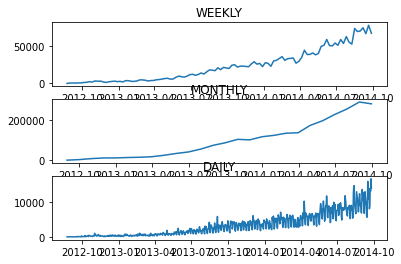

In [13]:
plt.subplot(311)
plt.plot(ts2)
plt.title('WEEKLY')
plt.subplot(312)
plt.plot(ts3)
plt.title('MONTHLY')
plt.subplot(313)
plt.plot(ts4)
plt.title('DAILY')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




			WEEKLYTIMESERIES



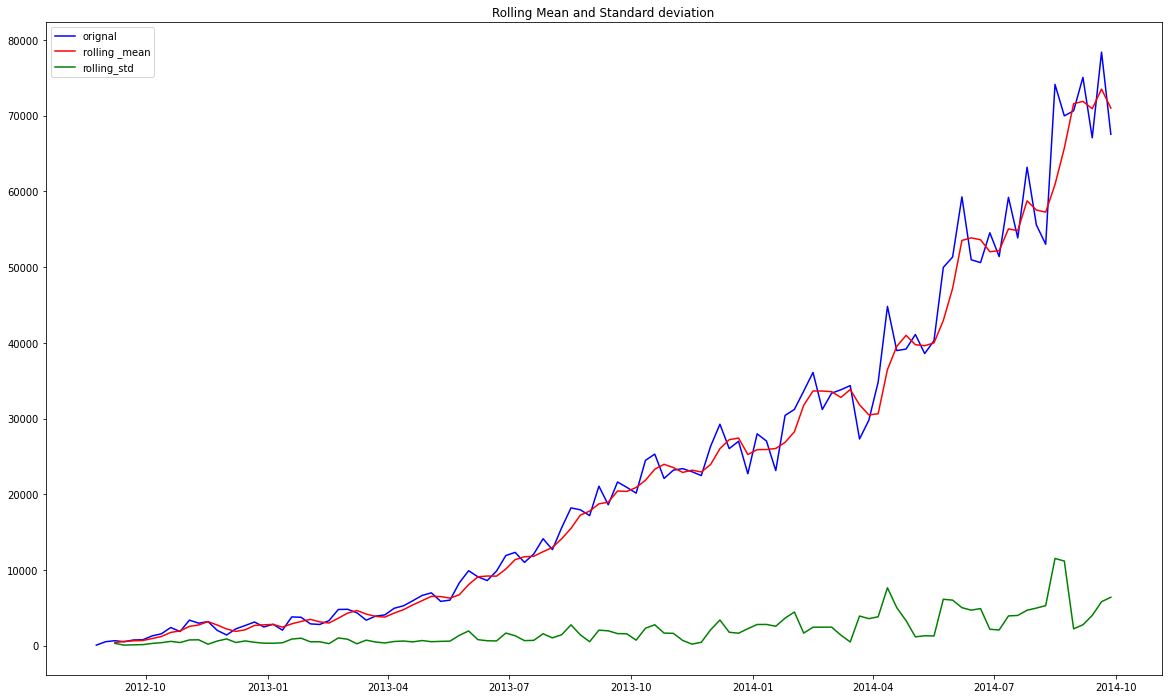

Result of Dickey Fuller test of: 
Test Statistics                  3.490722
p-value                          1.000000
#lags used                       9.000000
number of observations used    100.000000
Critical value1%                -3.497501
Critical value5%                -2.890906
Critical value10%               -2.582435
dtype: float64


			MONTHLYTIMESERIES



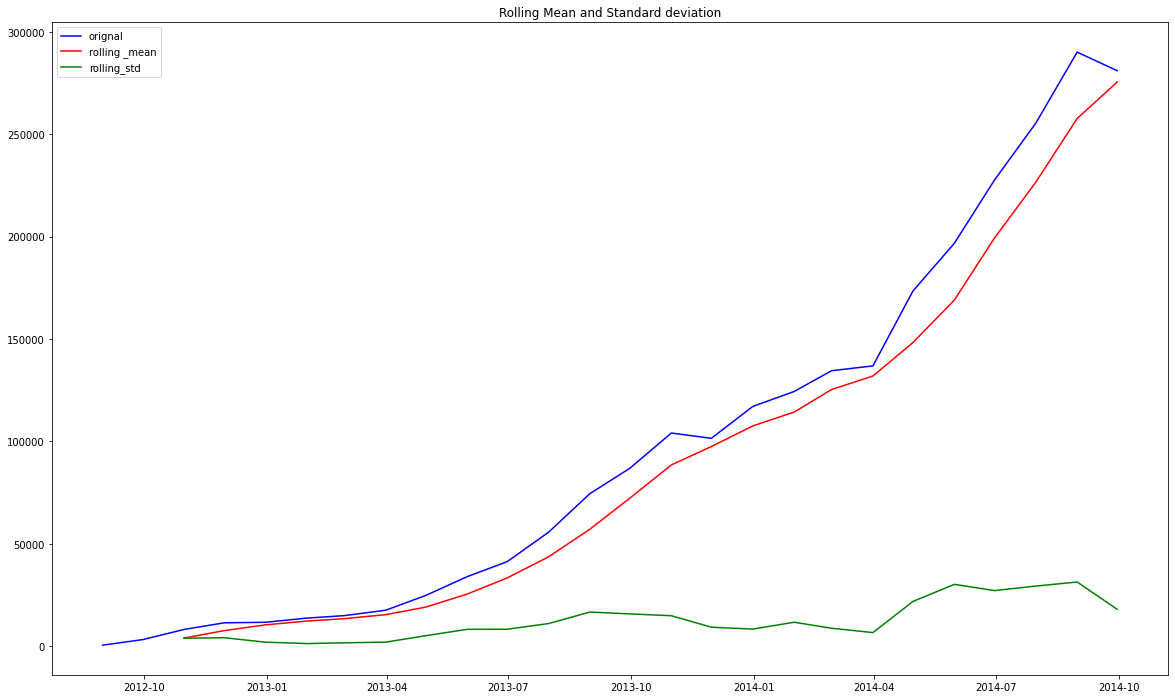

Result of Dickey Fuller test of: 
Test Statistics                 2.851599
p-value                         1.000000
#lags used                      5.000000
number of observations used    20.000000
Critical value1%               -3.809209
Critical value5%               -3.021645
Critical value10%              -2.650713
dtype: float64


			DAILYTIMESERIES



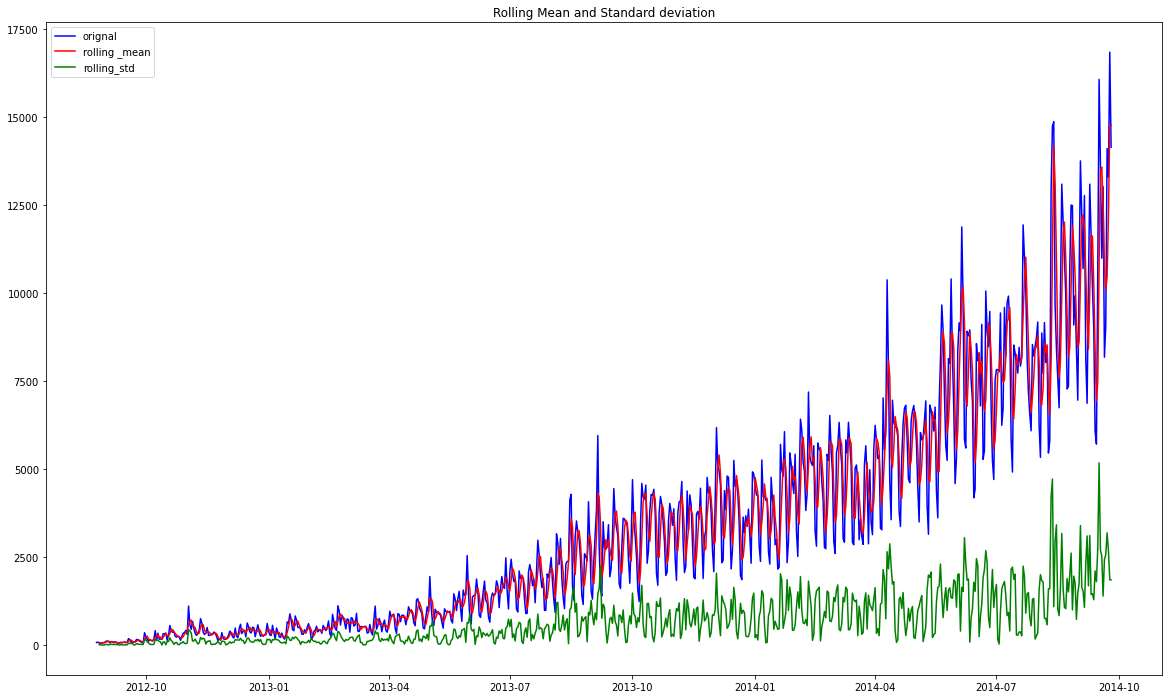

Result of Dickey Fuller test of: 
Test Statistics                  2.986351
p-value                          1.000000
#lags used                      20.000000
number of observations used    741.000000
Critical value1%                -3.439206
Critical value5%                -2.865448
Critical value10%               -2.568851
dtype: float64


In [14]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(timeseries,period):
    #Rollng statistics
    roll_mean = pd.Series(timeseries).rolling(window=3).mean()
    roll_std  = pd.Series(timeseries).rolling(window=3).std() 
    print('\n\n\t\t\t'+str(period) +'TIMESERIES\n')
    #Plotting rolling stats
    plt.figure(figsize=(20,12))
    plt.plot(timeseries,color = 'blue', label = 'orignal')
    plt.plot(roll_mean,color = 'red', label = 'rolling _mean')
    plt.plot(roll_std,color = 'green', label = 'rolling_std')
    
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard deviation')
    plt.show()
    
    #Perform Dickey-Fuller test
    
    print('Result of Dickey Fuller test of: ')
    testres = adfuller(timeseries,autolag='AIC')
    testout = pd.Series(testres[0:4],index = ['Test Statistics','p-value','#lags used', 'number of observations used'])
    
    for key, value in testres[4].items():
        testout['Critical value'+str(key)]= value
    
    print(testout)
    
test_stationary(ts2,'WEEKLY')
test_stationary(ts3,'MONTHLY')
test_stationary(ts4,'DAILY')

Text(0.5, 1.0, 'DAILY')

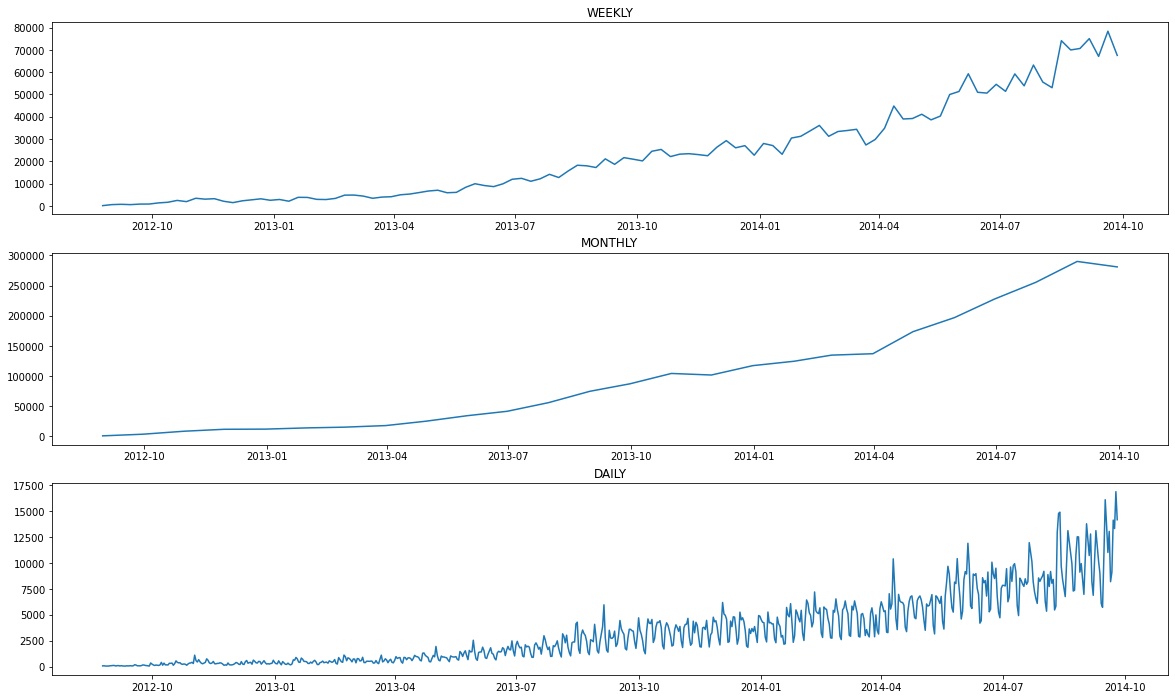

In [15]:
#TREND and SEASONALITY

ts_log2 = np.log(ts2)
ts_log3 = np.log(ts3)
ts_log4 = np.log(ts4) 

plt.figure(figsize = (20,12))
plt.subplot(311)
plt.plot(ts2)
plt.title('WEEKLY')
plt.subplot(312)
plt.plot(ts3)
plt.title('MONTHLY')
plt.subplot(313)
plt.plot(ts4)
plt.title('DAILY')

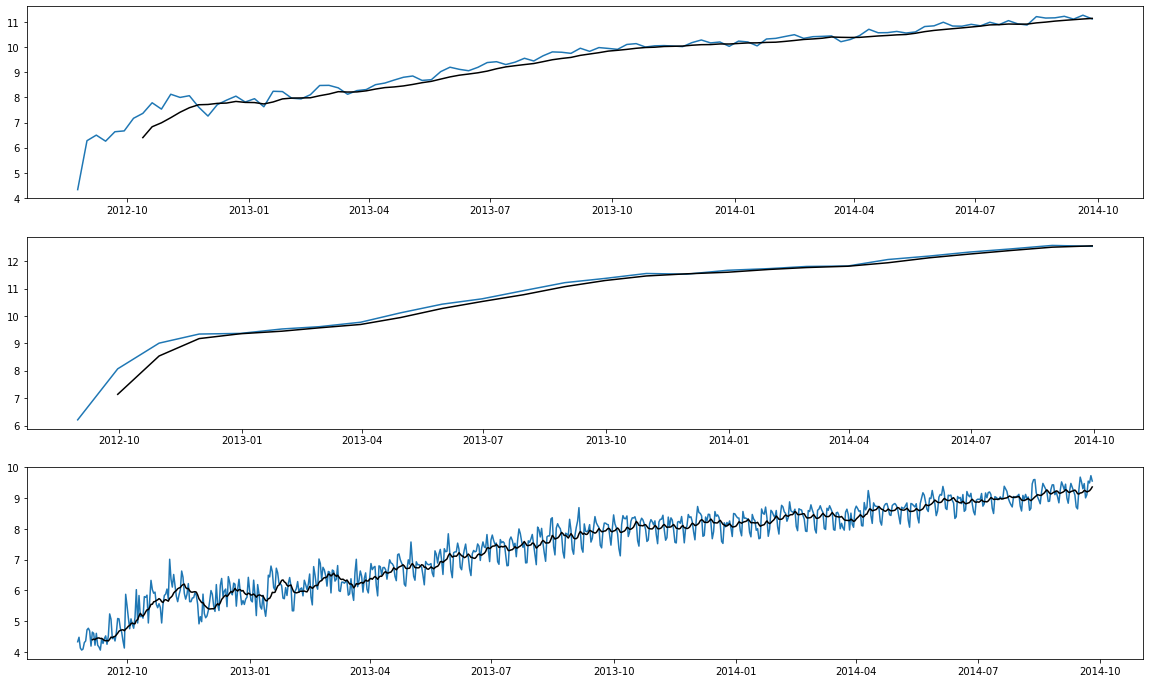

In [16]:
#Weekly
ts_log_copy2 = ts_log2
moving_avg2 = pd.Series(ts_log2).rolling(window=8).mean()

#Monthly
ts_log_copy3 = ts_log3
moving_avg3 = pd.Series(ts_log3).rolling(window=2).mean()

#Daily
ts_log_copy4 = ts_log4
moving_avg4 = pd.Series(ts_log4).rolling(window=12).mean()

plt.figure(figsize = (20,12))

#Weekly
plt.subplot(311)
plt.plot(ts_log2)
plt.plot(moving_avg2,color = 'black')

#Monthly
plt.subplot(312)
plt.plot(ts_log3)
plt.plot(moving_avg3,color = 'black')

#Daily
plt.subplot(313)
plt.plot(ts_log4)
plt.plot(moving_avg4,color = 'black')


In [17]:
#Weekly
ts_log_moving_avg_diff2 = ts_log2 - moving_avg2

#Monthly
ts_log_moving_avg_diff3 = ts_log3 - moving_avg3

#Daily
ts_log_moving_avg_diff4 = ts_log4 - moving_avg4

print(ts_log_moving_avg_diff2)
print(ts_log_moving_avg_diff3)
print(ts_log_moving_avg_diff4)

Datetime
2012-08-25         NaN
2012-09-01         NaN
2012-09-08         NaN
2012-09-15         NaN
2012-09-22         NaN
                ...   
2014-08-30    0.130856
2014-09-06    0.161975
2014-09-13    0.022076
2014-09-20    0.151024
2014-09-27   -0.022361
Freq: W-SAT, Name: Count, Length: 110, dtype: float64
Datetime
2012-08-31         NaN
2012-09-30    0.932165
2012-10-31    0.468904
2012-11-30    0.166152
2012-12-31    0.011708
2013-01-31    0.080796
2013-02-28    0.041947
2013-03-31    0.081444
2013-04-30    0.172330
2013-05-31    0.157381
2013-06-30    0.097951
2013-07-31    0.149280
2013-08-31    0.145944
2013-09-30    0.077173
2013-10-31    0.090138
2013-11-30   -0.012596
2013-12-31    0.071369
2014-01-31    0.030254
2014-02-28    0.039165
2014-03-31    0.008680
2014-04-30    0.118458
2014-05-31    0.063004
2014-06-30    0.072741
2014-07-31    0.057726
2014-08-31    0.063667
2014-09-30   -0.015908
Freq: M, Name: Count, dtype: float64
Datetime
2012-08-25         NaN
2012-08-



			WEEKLYTIMESERIES



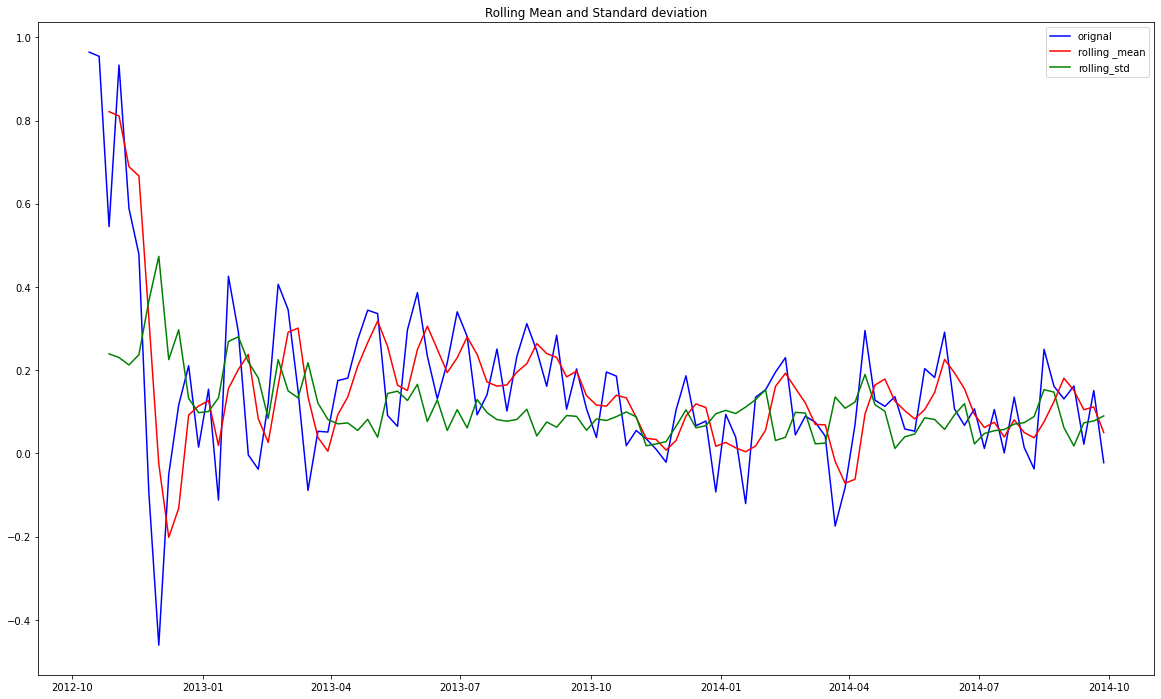

Result of Dickey Fuller test of: 
Test Statistics               -5.872880e+00
p-value                        3.209419e-07
#lags used                     0.000000e+00
number of observations used    1.020000e+02
Critical value1%              -3.496149e+00
Critical value5%              -2.890321e+00
Critical value10%             -2.582122e+00
dtype: float64


			MONTHLYTIMESERIES



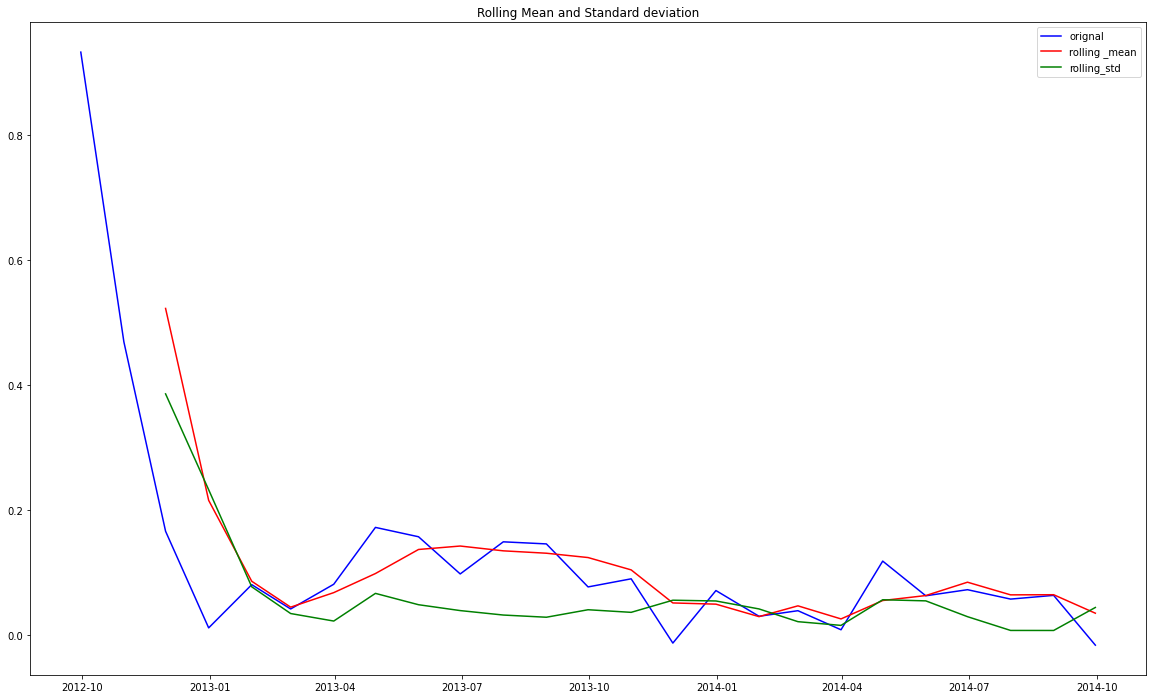

Result of Dickey Fuller test of: 
Test Statistics                -5.156673
p-value                         0.000011
#lags used                      1.000000
number of observations used    23.000000
Critical value1%               -3.752928
Critical value5%               -2.998500
Critical value10%              -2.638967
dtype: float64


			DAILYTIMESERIES



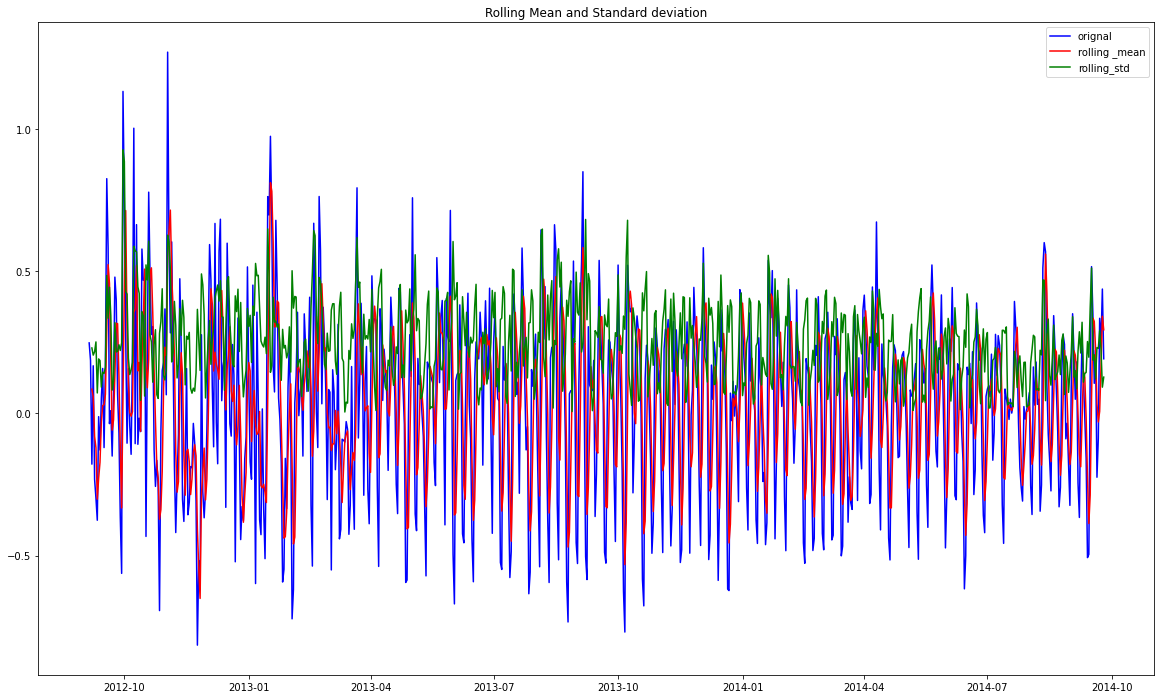

Result of Dickey Fuller test of: 
Test Statistics               -6.968391e+00
p-value                        8.793305e-10
#lags used                     2.000000e+01
number of observations used    7.300000e+02
Critical value1%              -3.439340e+00
Critical value5%              -2.865507e+00
Critical value10%             -2.568883e+00
dtype: float64


In [18]:
#Weekly
ts_log_moving_avg_diff2.dropna(inplace=True)
test_stationary(ts_log_moving_avg_diff2,'WEEKLY')

#Monthly
ts_log_moving_avg_diff3.dropna(inplace=True)
test_stationary(ts_log_moving_avg_diff3,'MONTHLY')

#Daily
ts_log_moving_avg_diff4.dropna(inplace=True)
test_stationary(ts_log_moving_avg_diff4,'DAILY')

## Exponential Smoothing

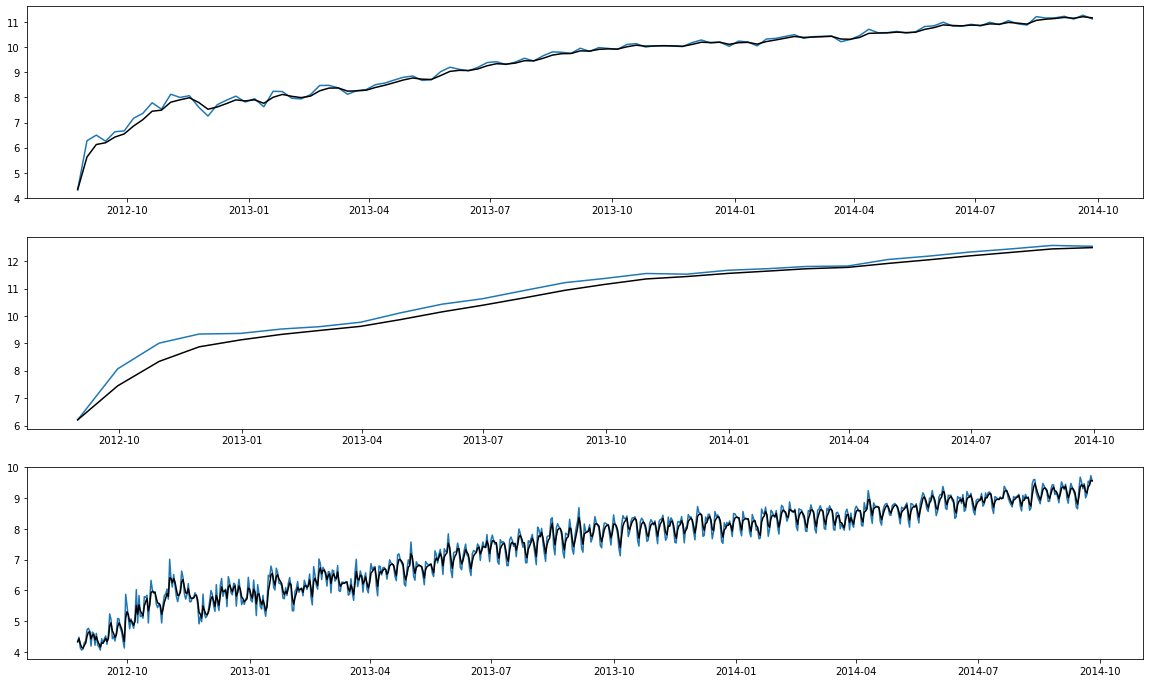

In [19]:
expo_weight2 = pd.Series(ts_log2).ewm(halflife =1).mean()
expo_weight3 = pd.Series(ts_log3).ewm(halflife =1).mean()
expo_weight4 = pd.Series(ts_log4).ewm(halflife =1).mean()

plt.figure(figsize = (20,12))

#Weekly
plt.subplot(311)
plt.plot(ts_log2)
plt.plot(expo_weight2,color = 'black')

#Monthly
plt.subplot(312)
plt.plot(ts_log3)
plt.plot(expo_weight3,color = 'black')

#Daily
plt.subplot(313)
plt.plot(ts_log4)
plt.plot(expo_weight4,color = 'black')

In [20]:
t4pred = np.exp(expo_weight4)
print(t4pred)
print(ts4)

t3pred = np.exp(expo_weight3)
print(t3pred)
print(ts3)

t2pred = np.exp(expo_weight2)
print(t2pred)
print(ts2)

Datetime
2012-08-25       76.000000
2012-08-26       83.803015
2012-08-27       70.546904
2012-08-28       63.550354
2012-08-29       61.692437
                  ...     
2014-09-21     9574.583803
2014-09-22    11625.610735
2014-09-23    12436.523840
2014-09-24    14478.606488
2014-09-25    14314.371765
Freq: D, Name: Count, Length: 762, dtype: float64
Datetime
2012-08-25       76
2012-08-26       88
2012-08-27       62
2012-08-28       58
2012-08-29       60
              ...  
2014-09-21     9102
2014-09-22    14116
2014-09-23    13304
2014-09-24    16856
2014-09-25    14152
Freq: D, Name: Count, Length: 762, dtype: int64
Datetime
2012-08-31       496.000000
2012-09-30      1718.939314
2012-10-31      4190.030330
2012-11-30      7144.458415
2012-12-31      9201.960458
2013-01-31     11268.480282
2013-02-28     12977.159423
2013-03-31     15100.295086
2013-04-30     19350.117243
2013-05-31     25632.523951
2013-06-30     32532.398195
2013-07-31     42548.853820
2013-08-31     56304.4

## Differencing on Exponential smoothing



			WEEKLYTIMESERIES



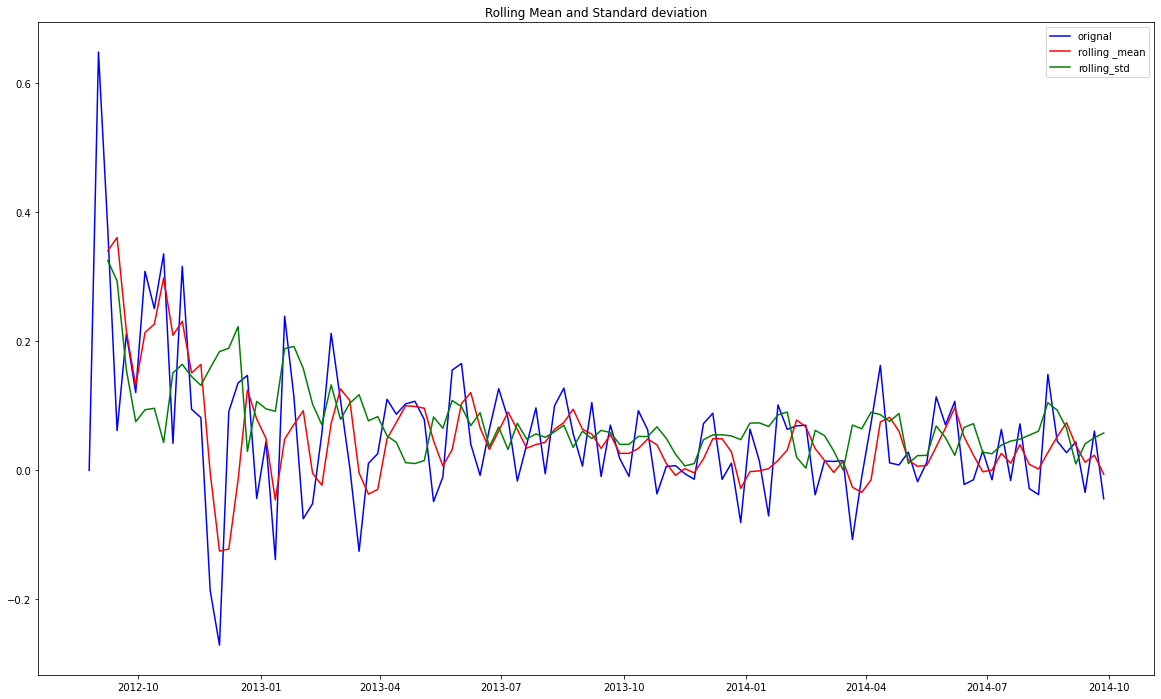

Result of Dickey Fuller test of: 
Test Statistics               -6.378157e+00
p-value                        2.256755e-08
#lags used                     2.000000e+00
number of observations used    1.070000e+02
Critical value1%              -3.492996e+00
Critical value5%              -2.888955e+00
Critical value10%             -2.581393e+00
dtype: float64


			MONTHLYTIMESERIES



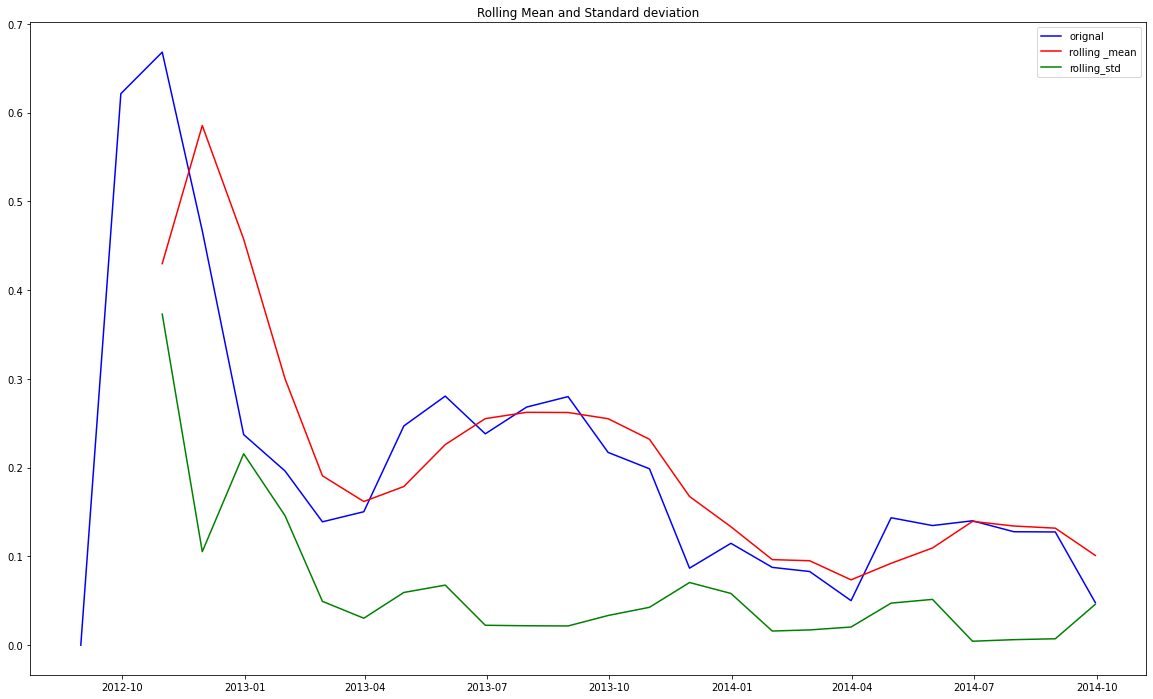

Result of Dickey Fuller test of: 
Test Statistics                -1.189381
p-value                         0.678147
#lags used                      8.000000
number of observations used    17.000000
Critical value1%               -3.889266
Critical value5%               -3.054358
Critical value10%              -2.666984
dtype: float64


			DAILYTIMESERIES



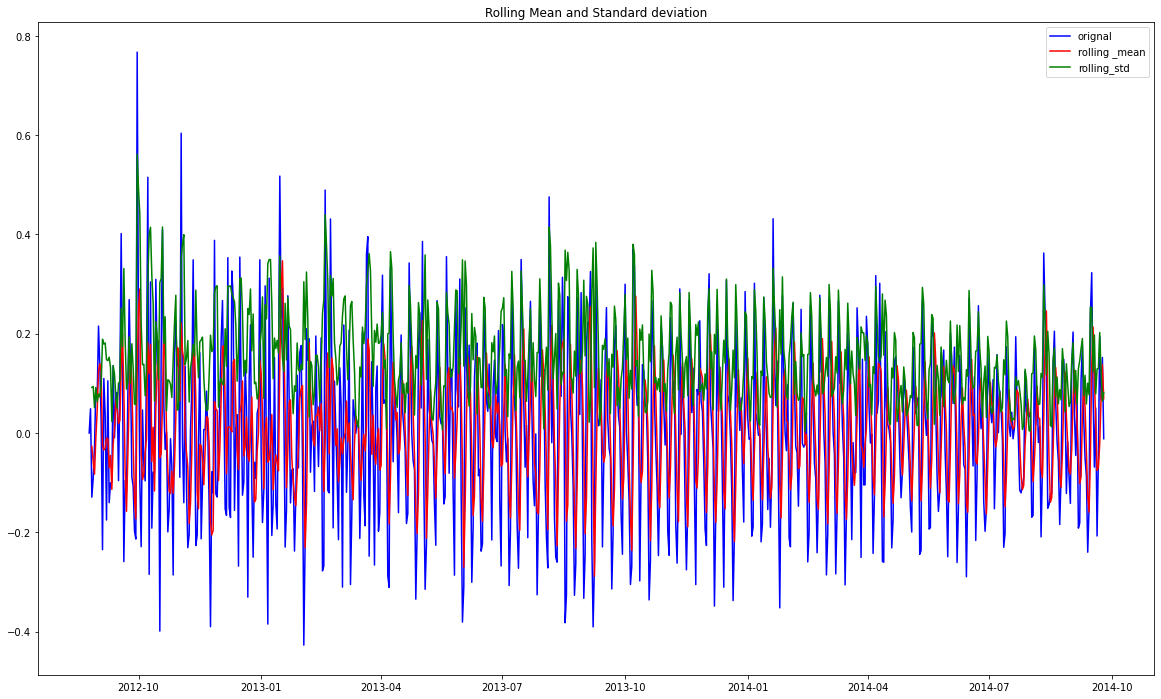

Result of Dickey Fuller test of: 
Test Statistics               -7.424573e+00
p-value                        6.600264e-11
#lags used                     2.000000e+01
number of observations used    7.410000e+02
Critical value1%              -3.439206e+00
Critical value5%              -2.865448e+00
Critical value10%             -2.568851e+00
dtype: float64


In [21]:
expo_weight_diff2 = ts_log2 - expo_weight2
test_stationary(expo_weight_diff2,'WEEKLY')

expo_weight_diff3 = ts_log3 - expo_weight3
test_stationary(expo_weight_diff3,'MONTHLY')

expo_weight_diff4 = ts_log4 - expo_weight4
test_stationary(expo_weight_diff4,'DAILY')

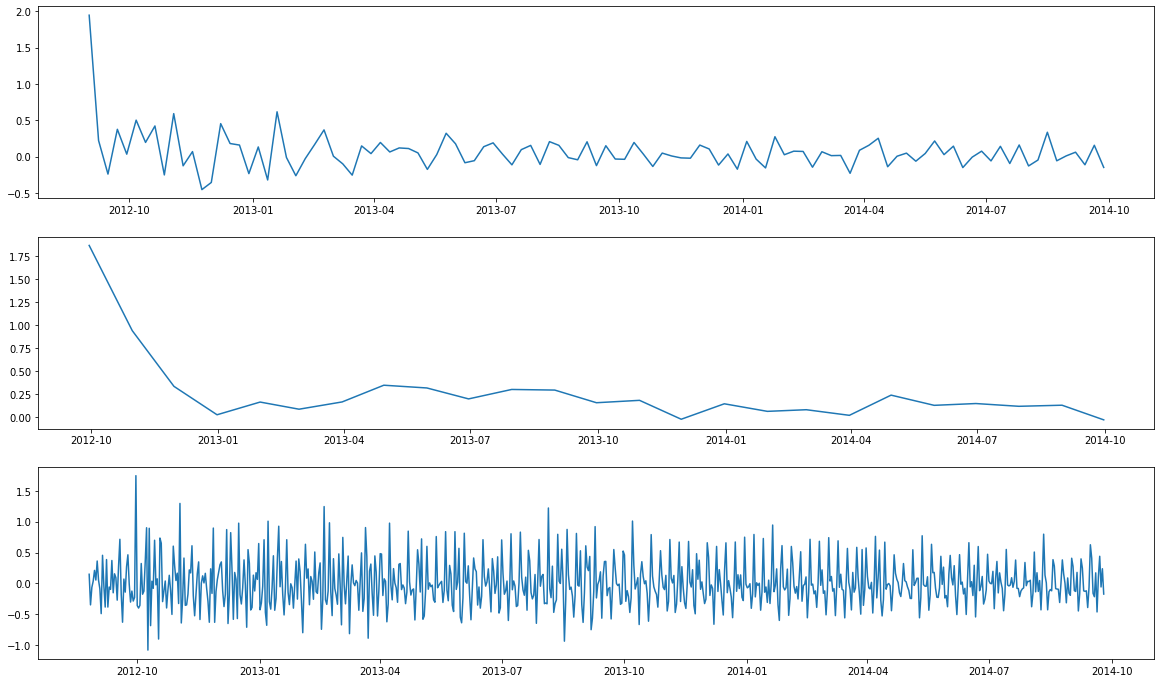

In [22]:
#differencing
ts_log_diff2 = ts_log2-ts_log2.shift()
ts_log_diff3 = ts_log3-ts_log3.shift()
ts_log_diff4 = ts_log4-ts_log4.shift()

plt.figure(figsize = (20,12))

#Weekly
plt.subplot(311)
plt.plot(ts_log_diff2)

#Monthly
plt.subplot(312)
plt.plot(ts_log_diff3)

#Daily
plt.subplot(313)
plt.plot(ts_log_diff4)

## Stationarity Check



			WEEKLYTIMESERIES



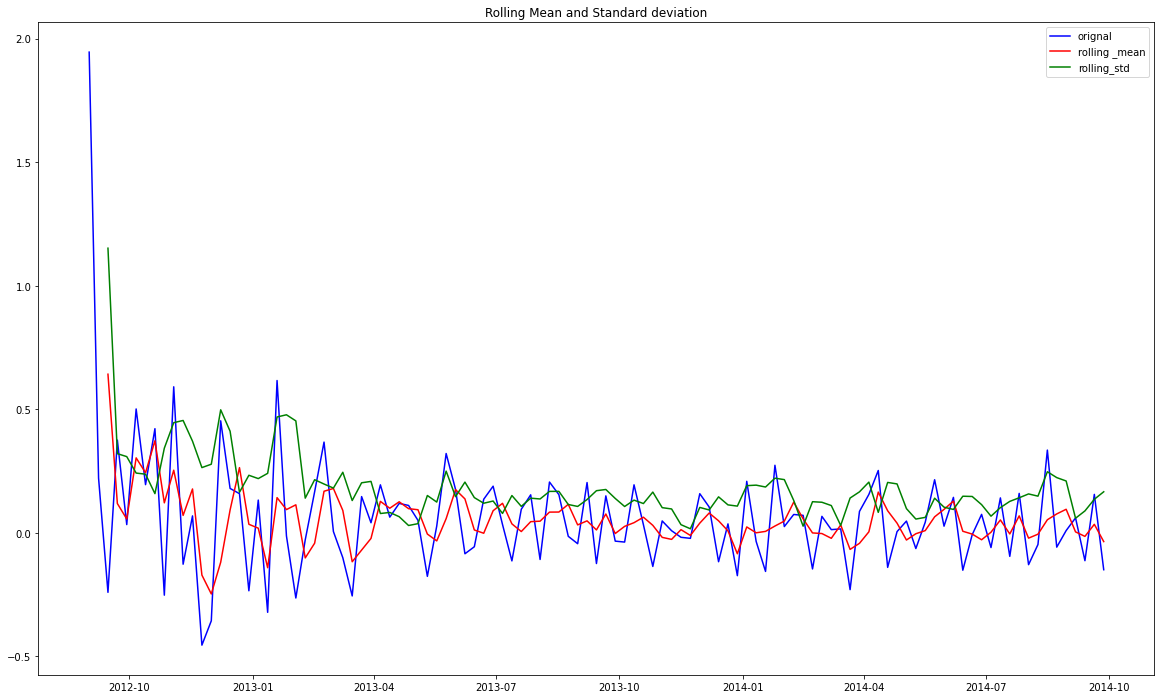

Result of Dickey Fuller test of: 
Test Statistics               -7.303932e+00
p-value                        1.316527e-10
#lags used                     3.000000e+00
number of observations used    1.050000e+02
Critical value1%              -3.494220e+00
Critical value5%              -2.889485e+00
Critical value10%             -2.581676e+00
dtype: float64


			MONTHLYTIMESERIES



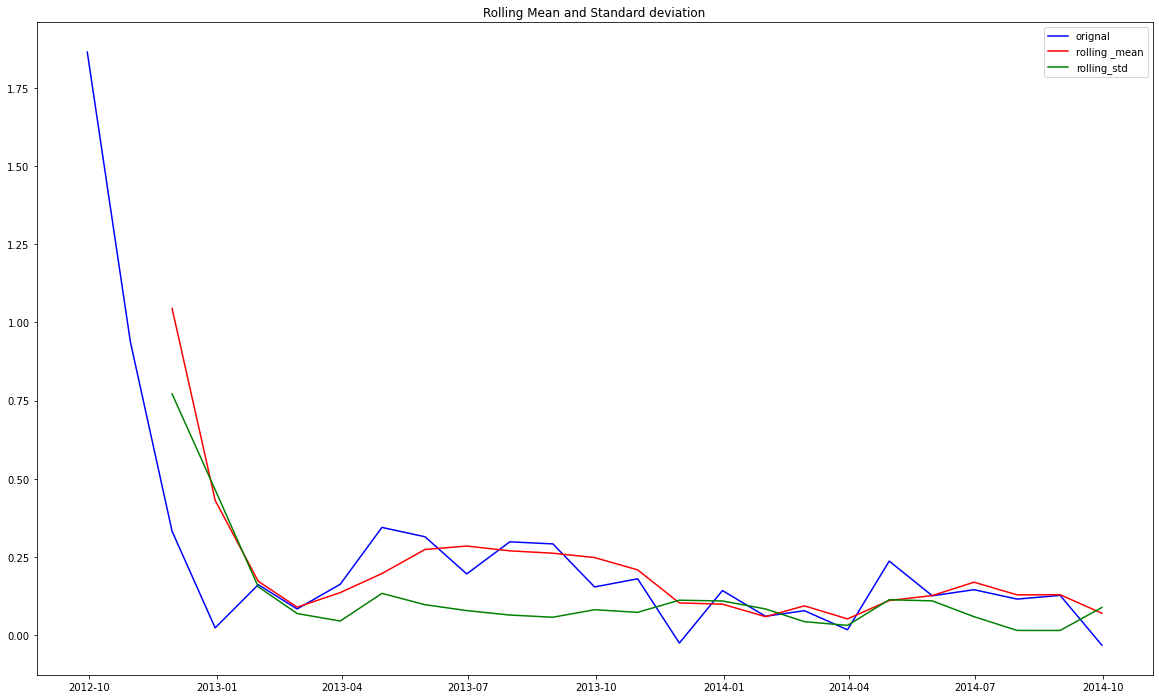

Result of Dickey Fuller test of: 
Test Statistics                -5.156673
p-value                         0.000011
#lags used                      1.000000
number of observations used    23.000000
Critical value1%               -3.752928
Critical value5%               -2.998500
Critical value10%              -2.638967
dtype: float64


			DAILYTIMESERIES



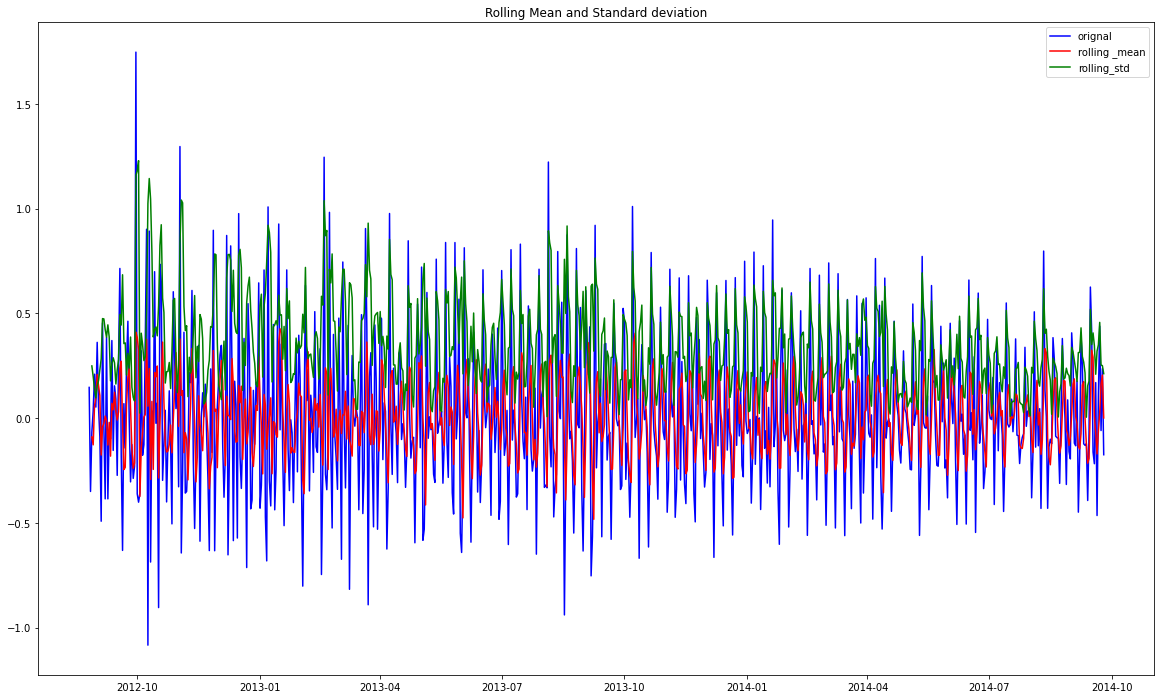

Result of Dickey Fuller test of: 
Test Statistics               -8.877418e+00
p-value                        1.346196e-14
#lags used                     1.900000e+01
number of observations used    7.410000e+02
Critical value1%              -3.439206e+00
Critical value5%              -2.865448e+00
Critical value10%             -2.568851e+00
dtype: float64


In [23]:
ts_log_diff2.dropna(inplace=True)
ts_log_diff3.dropna(inplace=True)
ts_log_diff4.dropna(inplace=True)

test_stationary(ts_log_diff2,'WEEKLY')
test_stationary(ts_log_diff3,'MONTHLY')
test_stationary(ts_log_diff4,'DAILY')

## Applying Decomposition

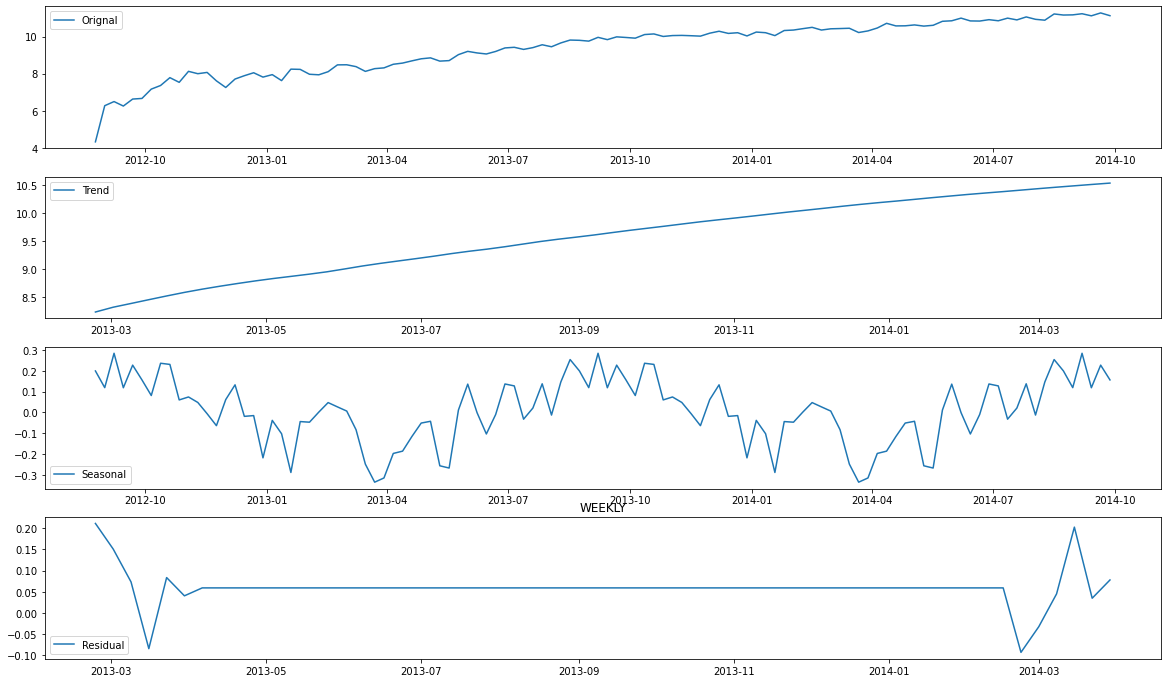

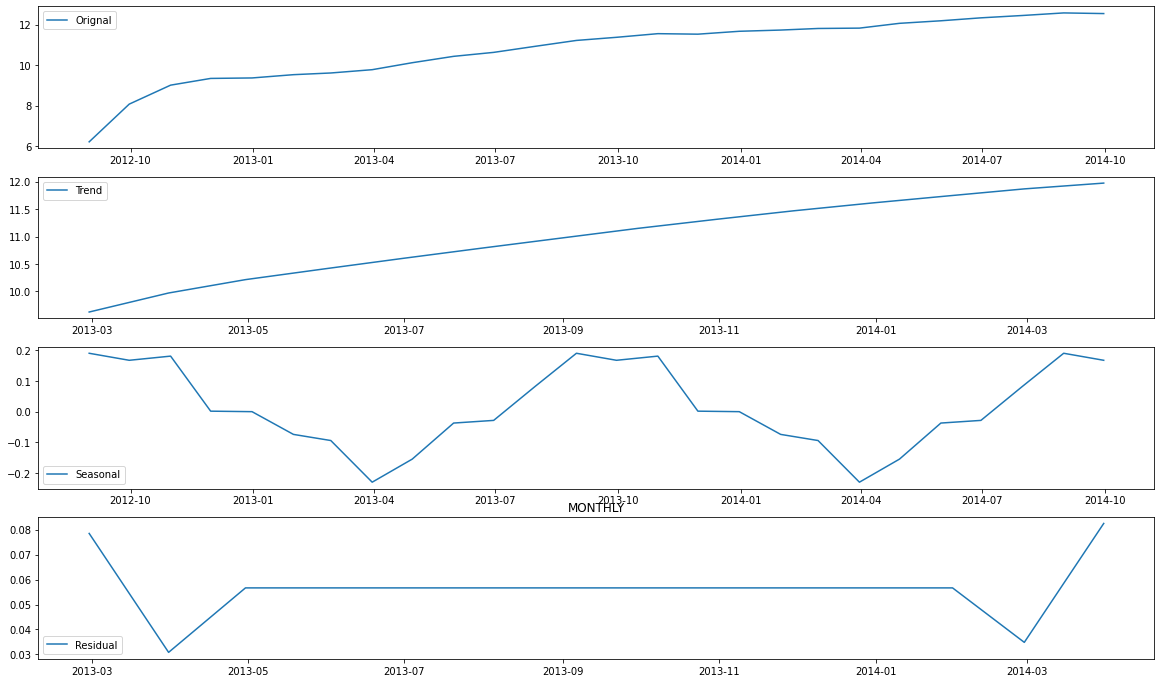

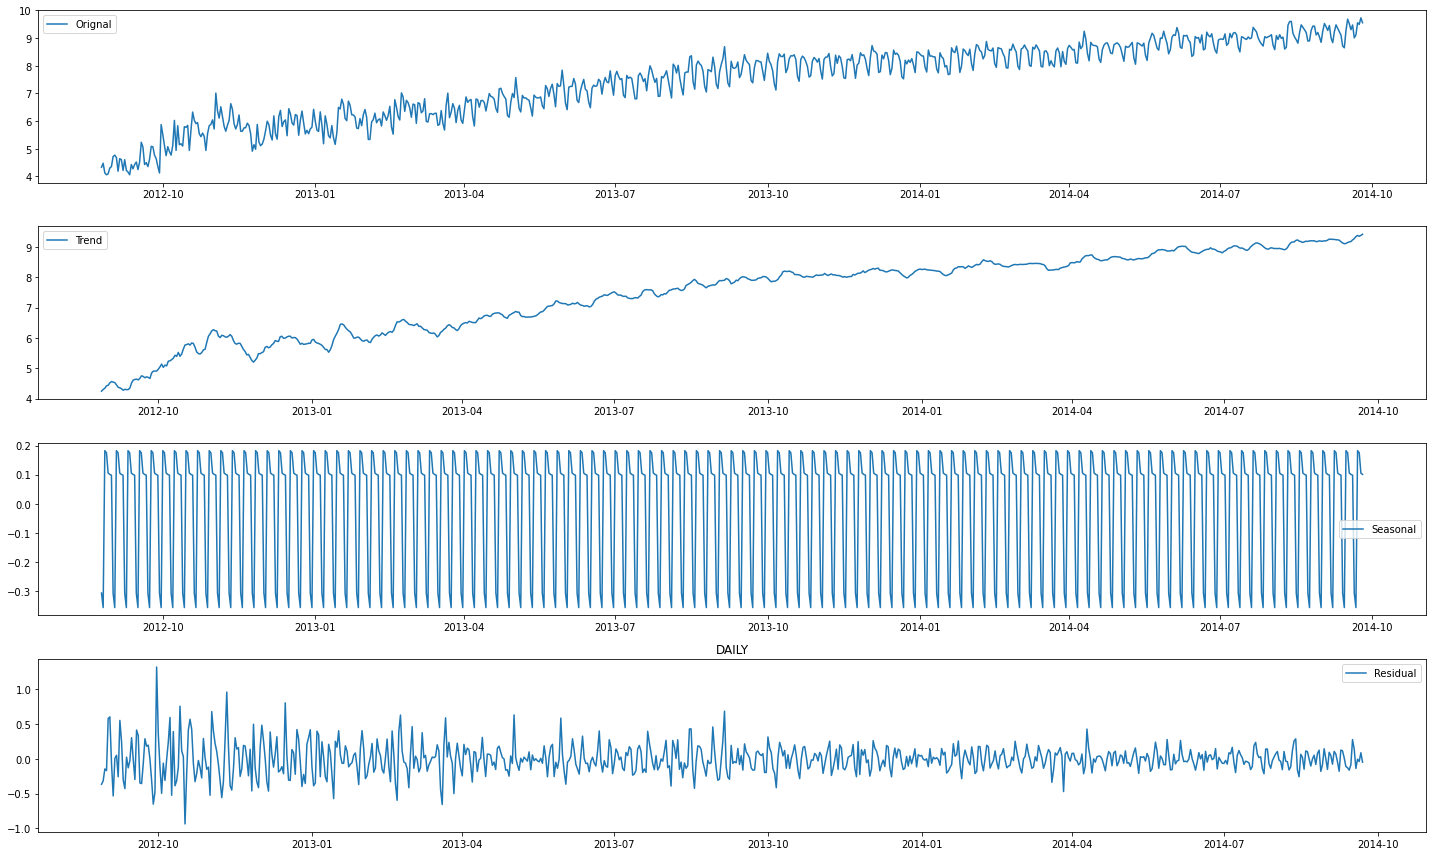

In [24]:
#Decomposing

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition2 = seasonal_decompose(ts_log2)
decomposition3 = seasonal_decompose(ts_log3)
decomposition4 = seasonal_decompose(ts_log4)

#Weekly TIMESERIES
trend2    = decomposition2.trend
seasonal2 = decomposition2.seasonal
residual2 = decomposition2.resid

#Monthly TIMESERIES
trend3    = decomposition3.trend
seasonal3 = decomposition3.seasonal
residual3 = decomposition3.resid

#Daily TIMESERIES
trend4    = decomposition4.trend
seasonal4 = decomposition4.seasonal
residual4 = decomposition4.resid

#Weekly TIMESERIES
plt.figure(figsize = (20,12))
plt.subplot(411)
plt.plot(ts_log2,label = 'Orignal')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend2,label = 'Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal2,label = 'Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual2,label = 'Residual')
plt.legend(loc='best')
plt.title("WEEKLY")
print('\n\n')

#MONTHLY TIMESERIES
plt.figure(figsize = (20,12))
plt.subplot(411)
plt.plot(ts_log3,label = 'Orignal')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend3,label = 'Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal3,label = 'Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual3,label = 'Residual')
plt.legend(loc='best')
plt.title("MONTHLY")
print('\n\n')

#DAILY TIMESERIES
plt.figure(figsize = (20,12))
plt.subplot(411)
plt.plot(ts_log4,label = 'Orignal')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend4,label = 'Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal4,label = 'Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual4,label = 'Residual')
plt.legend(loc='best')
plt.title("DAILY")
print('\n\n')


plt.tight_layout()



			WEEKLYTIMESERIES



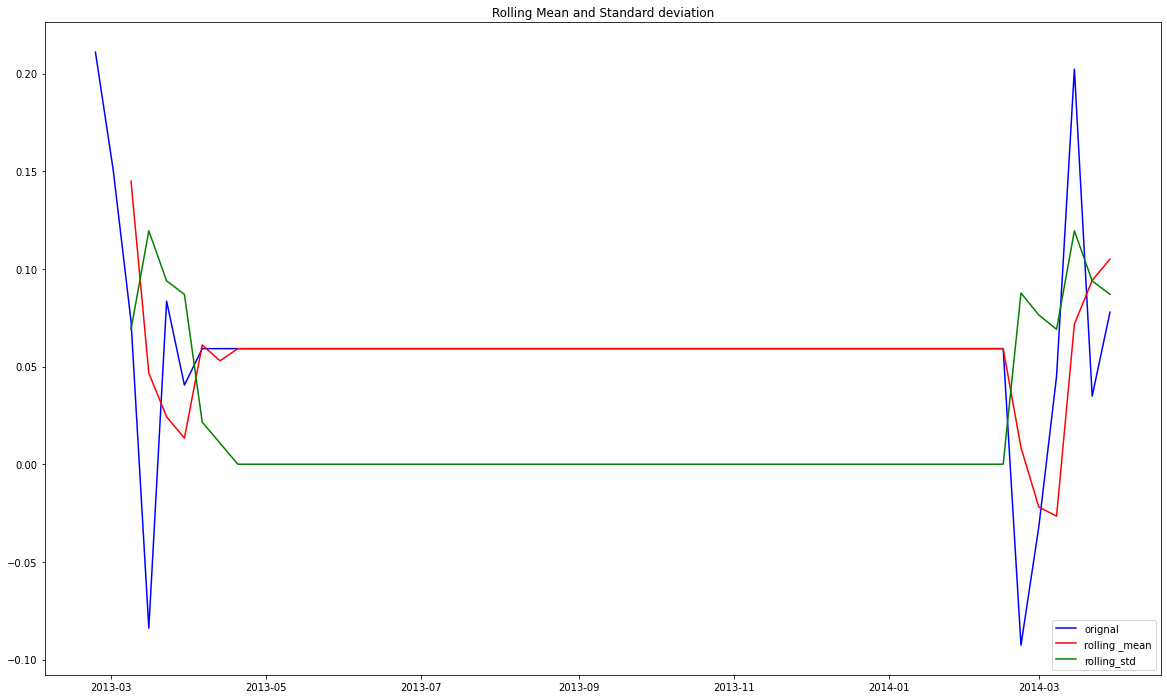

Result of Dickey Fuller test of: 
Test Statistics                -4.699881
p-value                         0.000084
#lags used                      4.000000
number of observations used    53.000000
Critical value1%               -3.560242
Critical value5%               -2.917850
Critical value10%              -2.596796
dtype: float64


			MONTHLYTIMESERIES



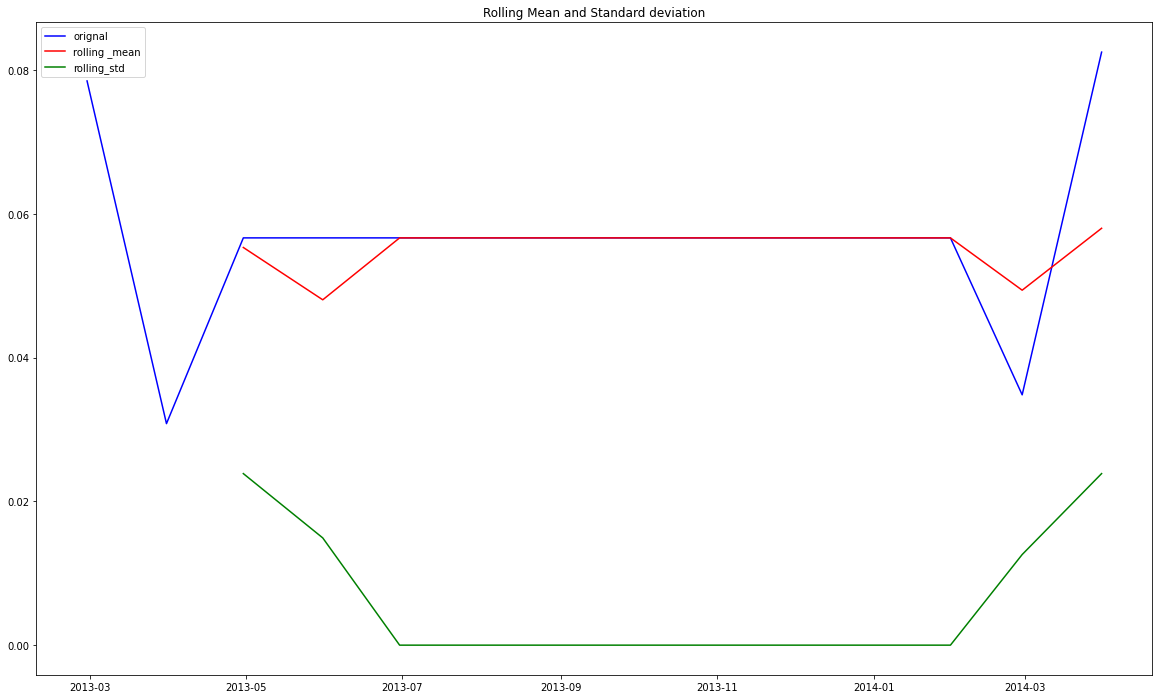

Result of Dickey Fuller test of: 
Test Statistics               -7.646388e+00
p-value                        1.837876e-11
#lags used                     0.000000e+00
number of observations used    1.300000e+01
Critical value1%              -4.068854e+00
Critical value5%              -3.127149e+00
Critical value10%             -2.701730e+00
dtype: float64


			DAILYTIMESERIES



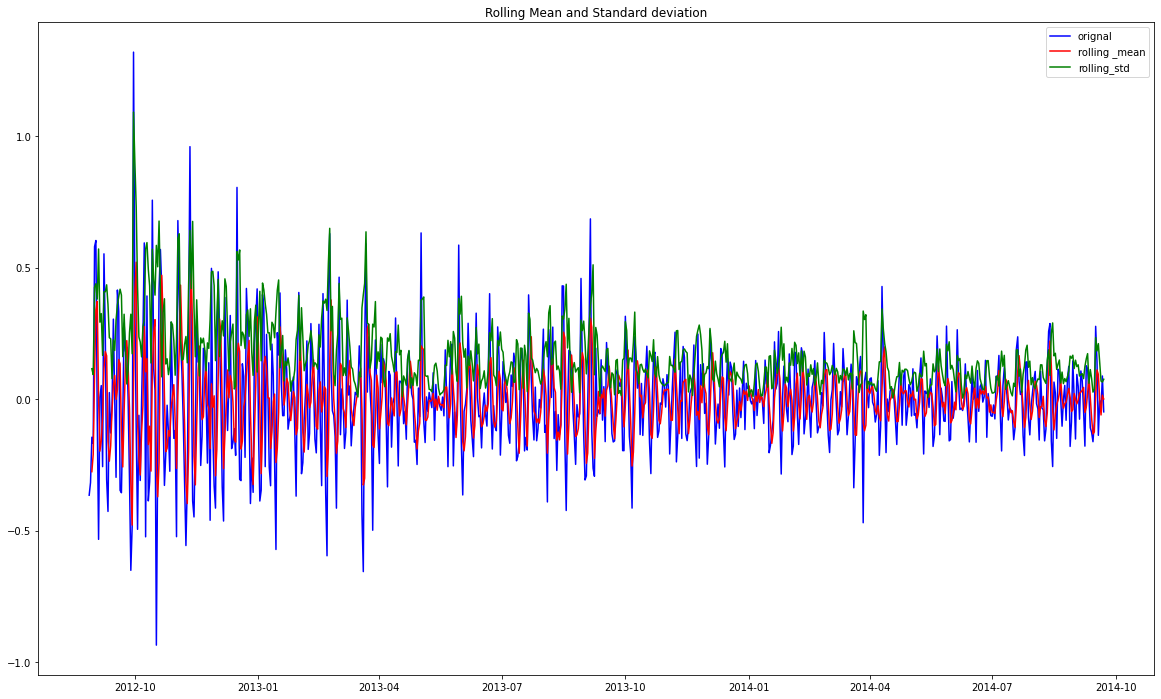

Result of Dickey Fuller test of: 
Test Statistics               -1.142413e+01
p-value                        6.760311e-21
#lags used                     2.000000e+01
number of observations used    7.350000e+02
Critical value1%              -3.439278e+00
Critical value5%              -2.865480e+00
Critical value10%             -2.568868e+00
dtype: float64


In [25]:
#Checking stationarity of residuals

ts_log_decompose2 = residual2
ts_log_decompose3 = residual3
ts_log_decompose4 = residual4
ts_log_decompose2.dropna(inplace=True)
ts_log_decompose3.dropna(inplace=True)
ts_log_decompose4.dropna(inplace=True)
test_stationary(ts_log_decompose2,'WEEKLY')
test_stationary(ts_log_decompose3,'MONTHLY')
test_stationary(ts_log_decompose4,'DAILY')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


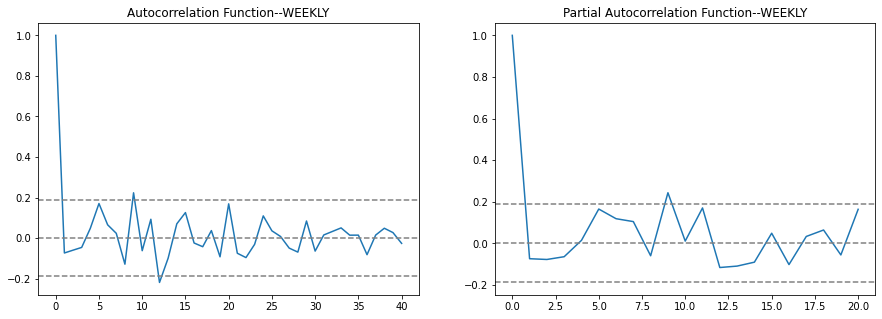

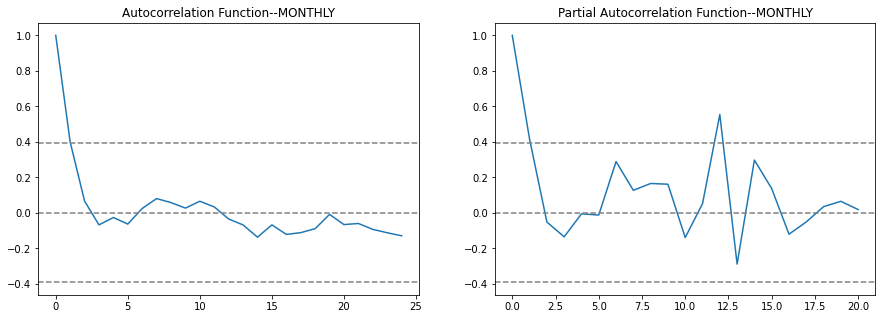

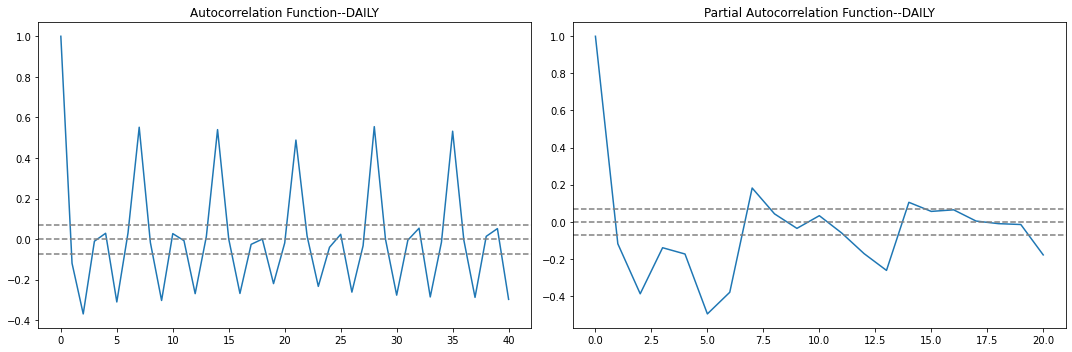

In [26]:
#ACF and PACF plots

from statsmodels.tsa.stattools import acf,pacf

lag_acf2  = acf(ts_log_diff2)
lag_pacf2 = pacf(ts_log_diff2,nlags=20, method = 'ols')

lag_acf3  = acf(ts_log_diff3)
lag_pacf3 = pacf(ts_log_diff3,nlags=20, method = 'ols')

lag_acf4  = acf(ts_log_diff4)
lag_pacf4 = pacf(ts_log_diff4,nlags=20, method = 'ols')

#Plot ACF

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(lag_acf2)
plt.axhline(y=0,linestyle='--',color = 'grey')
plt.axhline(y =  1.96/np.sqrt(len(ts_log_diff2)),linestyle='--',color = 'grey')
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff2)),linestyle='--',color = 'grey')
plt.title('Autocorrelation Function--WEEKLY')

#Plot PACF

plt.subplot(122)
plt.plot(lag_pacf2)
plt.axhline(y=0,linestyle='--',color = 'grey')
plt.axhline(y =  1.96/np.sqrt(len(ts_log_diff2)),linestyle='--',color = 'grey')
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff2)),linestyle='--',color = 'grey')
plt.title('Partial Autocorrelation Function--WEEKLY')


plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(lag_acf3)
plt.axhline(y=0,linestyle='--',color = 'grey')
plt.axhline(y =  1.96/np.sqrt(len(ts_log_diff3)),linestyle='--',color = 'grey')
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff3)),linestyle='--',color = 'grey')
plt.title('Autocorrelation Function--MONTHLY')

#Plot PACF

plt.subplot(122)
plt.plot(lag_pacf3)
plt.axhline(y=0,linestyle='--',color = 'grey')
plt.axhline(y =  1.96/np.sqrt(len(ts_log_diff3)),linestyle='--',color = 'grey')
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff3)),linestyle='--',color = 'grey')
plt.title('Partial Autocorrelation Function--MONTHLY')


plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(lag_acf4)
plt.axhline(y=0,linestyle='--',color = 'grey')
plt.axhline(y =  1.96/np.sqrt(len(ts_log_diff4)),linestyle='--',color = 'grey')
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff4)),linestyle='--',color = 'grey')
plt.title('Autocorrelation Function--DAILY')

#Plot PACF

plt.subplot(122)
plt.plot(lag_pacf4)
plt.axhline(y=0,linestyle='--',color = 'grey')
plt.axhline(y =  1.96/np.sqrt(len(ts_log_diff4)),linestyle='--',color = 'grey')
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff4)),linestyle='--',color = 'grey')
plt.title('Partial Autocorrelation Function--DAILY')

plt.tight_layout()



Building ARIMA MODEL

In [27]:
#Building ARIMA

from statsmodels.tsa.arima_model import ARIMA

Text(0.5, 1.0, 'RSS : 55.086796--DAILY')

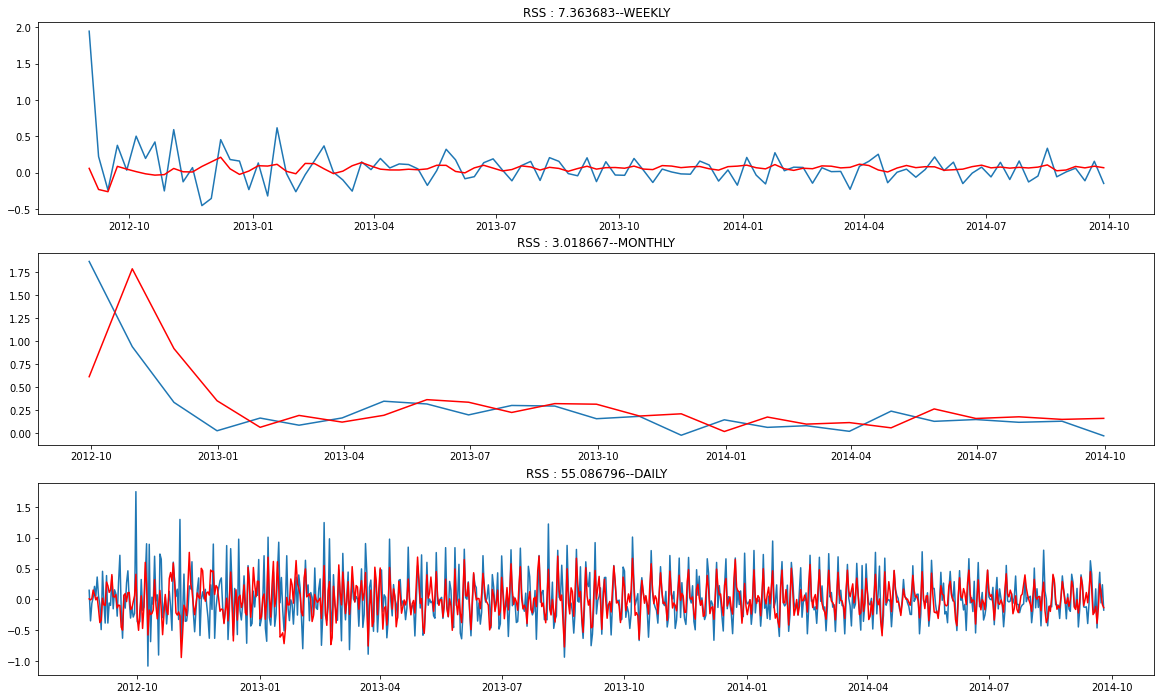

In [42]:
#AR MODEL

model_AR2 = ARIMA(ts_log2, order = (2,1,0))
residual_AR2 = model_AR2.fit(disp=-1)

model_AR3 = ARIMA(ts_log3, order = (1,1,0))
residual_AR3 = model_AR3.fit(disp=-1)

model_AR4 = ARIMA(ts_log4, order = (6,1,0))
residual_AR4 = model_AR4.fit(disp=-1)

plt.figure(figsize = (20,12))
#Weekly
plt.subplot(311)
plt.plot(ts_log_diff2)
plt.plot(residual_AR2.fittedvalues,color = 'red')
plt.title('RSS : %4f--WEEKLY'% sum((residual_AR2.fittedvalues - ts_log_diff2)**2))

#Monthly
plt.subplot(312)
plt.plot(ts_log_diff3)
plt.plot(residual_AR3.fittedvalues,color = 'red')
plt.title('RSS : %4f--MONTHLY'% sum((residual_AR3.fittedvalues - ts_log_diff3)**2))

#Daily
plt.subplot(313)
plt.plot(ts_log_diff4)
plt.plot(residual_AR4.fittedvalues,color = 'red')
plt.title('RSS : %4f--DAILY'% sum((residual_AR4.fittedvalues - ts_log_diff4)**2))

Text(0.5, 1.0, 'RSS : 73.844132--DAILY')

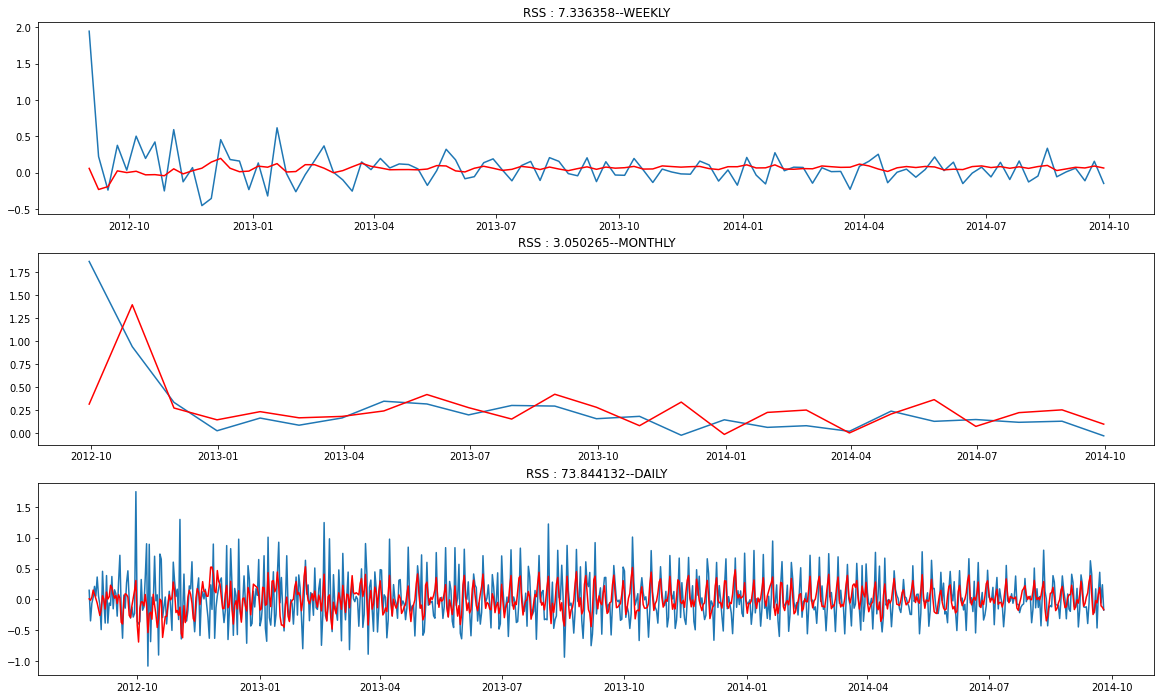

In [43]:
#MA MODEL

model_MA2 = ARIMA(ts_log2, order = (0,1,2))
residual_MA2 = model_MA2.fit(disp=-1)

model_MA3 = ARIMA(ts_log3, order = (0,1,2))
residual_MA3 = model_MA3.fit(disp=-1)

model_MA4 = ARIMA(ts_log4, order = (0,1,2))
residual_MA4 = model_MA4.fit(disp=-1)

plt.figure(figsize = (20,12))

#Weekly
plt.subplot(311)
plt.plot(ts_log_diff2)
plt.plot(residual_MA2.fittedvalues,color = 'red')
plt.title('RSS : %4f--WEEKLY'% sum((residual_MA2.fittedvalues - ts_log_diff2)**2))

#Monthly
plt.subplot(312)
plt.plot(ts_log_diff3)
plt.plot(residual_MA3.fittedvalues,color = 'red')
plt.title('RSS : %4f--MONTHLY'% sum((residual_MA3.fittedvalues - ts_log_diff3)**2))

#Daily
plt.subplot(313)
plt.plot(ts_log_diff4)
plt.plot(residual_MA4.fittedvalues,color = 'red')
plt.title('RSS : %4f--DAILY'% sum((residual_MA4.fittedvalues - ts_log_diff4)**2))

Text(0.5, 1.0, 'RSS : 72.902034--DAILY')

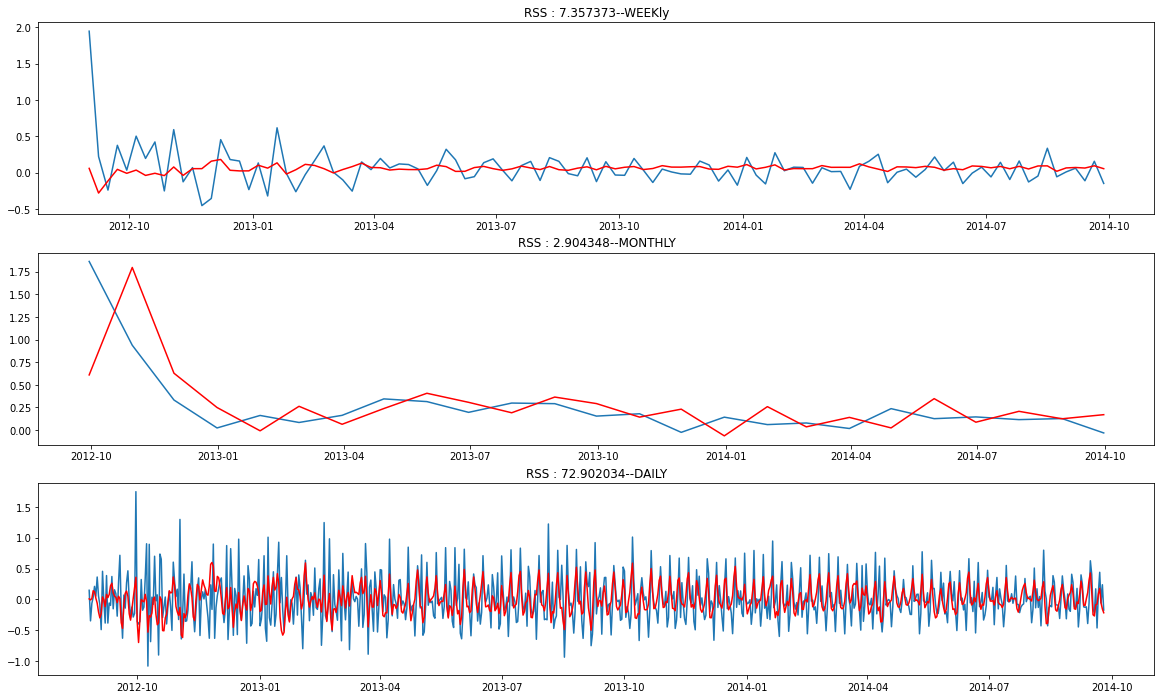

In [41]:
#COMBINED ARIMA MODEL

model_ARIMA2 = ARIMA(ts_log2, order = (1,1,1))
residual_ARIMA2 = model_ARIMA2.fit(disp=-1)

model_ARIMA3 = ARIMA(ts_log3, order = (1,1,1))
residual_ARIMA3 = model_ARIMA3.fit(disp=-1)

model_ARIMA4 = ARIMA(ts_log4, order = (2,1,1))
residual_ARIMA4 = model_ARIMA4.fit(disp=-1)

plt.figure(figsize = (20,12))

#Weekly
plt.subplot(311)
plt.plot(ts_log_diff2)
plt.plot(residual_ARIMA2.fittedvalues,color = 'red')
plt.title('RSS : %4f--WEEKly'% sum((residual_ARIMA2.fittedvalues - ts_log_diff2)**2))

#Monthly
plt.subplot(312)
plt.plot(ts_log_diff3)
plt.plot(residual_ARIMA3.fittedvalues,color = 'red')
plt.title('RSS : %4f--MONTHLY'% sum((residual_ARIMA3.fittedvalues - ts_log_diff3)**2))

#Daily
plt.subplot(313)
plt.plot(ts_log_diff4)
plt.plot(residual_ARIMA4.fittedvalues,color = 'red')
plt.title('RSS : %4f--DAILY'% sum((residual_ARIMA4.fittedvalues - ts_log_diff4)**2))

## Taking it back to orignal scale

In [31]:

#taking it back to orignal scale

pred_Arima_diff2 = pd.Series(residual_ARIMA2.fittedvalues,copy = True)       #Weekly
pred_Arima_diff3 = pd.Series(residual_ARIMA3.fittedvalues,copy = True)       #Monthly
pred_Arima_diff4 = pd.Series(residual_ARIMA4.fittedvalues,copy = True)       #Daily
print(pred_Arima_diff2)
print(pred_Arima_diff3)
print(pred_Arima_diff4)

Datetime
2012-09-01    0.058273
2012-09-08   -0.281512
2012-09-15   -0.114518
2012-09-22    0.044596
2012-09-29   -0.009722
                ...   
2014-08-30    0.064335
2014-09-06    0.070411
2014-09-13    0.062863
2014-09-20    0.093706
2014-09-27    0.053934
Freq: W-SAT, Length: 109, dtype: float64
Datetime
2012-09-30    0.609616
2012-10-31    1.797626
2012-11-30    0.628536
2012-12-31    0.249477
2013-01-31   -0.008249
2013-02-28    0.262741
2013-03-31    0.064107
2013-04-30    0.237912
2013-05-31    0.406797
2013-06-30    0.306693
2013-07-31    0.191298
2013-08-31    0.364894
2013-09-30    0.292776
2013-10-31    0.143233
2013-11-30    0.231177
2013-12-31   -0.063890
2014-01-31    0.259016
2014-02-28    0.035550
2014-03-31    0.140196
2014-04-30    0.023870
2014-05-31    0.347355
2014-06-30    0.086990
2014-07-31    0.207264
2014-08-31    0.124795
2014-09-30    0.170201
Freq: M, dtype: float64
Datetime
2012-08-26    0.006676
2012-08-27   -0.009998
2012-08-28    0.012312
2012-08-29 

In [32]:
pred_Arima_cumsum2 = pred_Arima_diff2.cumsum()       #Weekly
pred_Arima_cumsum3 = pred_Arima_diff3.cumsum()       #Monthly
pred_Arima_cumsum4 = pred_Arima_diff4.cumsum()       #Daily
print(pred_Arima_cumsum2)
print(pred_Arima_cumsum3)
print(pred_Arima_cumsum4)

Datetime
2012-09-01    0.058273
2012-09-08   -0.223239
2012-09-15   -0.337756
2012-09-22   -0.293160
2012-09-29   -0.302882
                ...   
2014-08-30    5.911512
2014-09-06    5.981923
2014-09-13    6.044786
2014-09-20    6.138492
2014-09-27    6.192426
Freq: W-SAT, Length: 109, dtype: float64
Datetime
2012-09-30    0.609616
2012-10-31    2.407243
2012-11-30    3.035779
2012-12-31    3.285255
2013-01-31    3.277007
2013-02-28    3.539748
2013-03-31    3.603854
2013-04-30    3.841767
2013-05-31    4.248564
2013-06-30    4.555257
2013-07-31    4.746554
2013-08-31    5.111449
2013-09-30    5.404225
2013-10-31    5.547458
2013-11-30    5.778634
2013-12-31    5.714744
2014-01-31    5.973760
2014-02-28    6.009310
2014-03-31    6.149506
2014-04-30    6.173376
2014-05-31    6.520731
2014-06-30    6.607721
2014-07-31    6.814985
2014-08-31    6.939780
2014-09-30    7.109981
Freq: M, dtype: float64
Datetime
2012-08-26    0.006676
2012-08-27   -0.003322
2012-08-28    0.008990
2012-08-29 

In [33]:
pred_Arima_log2 = pd.Series(ts_log2.iloc[0], index = ts_log2.index)       #Weekly
pred_Arima_log3 = pd.Series(ts_log3.iloc[0], index = ts_log3.index)       #Monthly
pred_Arima_log4 = pd.Series(ts_log4.iloc[0], index = ts_log4.index)       #Daily
print(pred_Arima_log2)
print(pred_Arima_log3)
print(pred_Arima_log4)

Datetime
2012-08-25    4.330733
2012-09-01    4.330733
2012-09-08    4.330733
2012-09-15    4.330733
2012-09-22    4.330733
                ...   
2014-08-30    4.330733
2014-09-06    4.330733
2014-09-13    4.330733
2014-09-20    4.330733
2014-09-27    4.330733
Freq: W-SAT, Length: 110, dtype: float64
Datetime
2012-08-31    6.206576
2012-09-30    6.206576
2012-10-31    6.206576
2012-11-30    6.206576
2012-12-31    6.206576
2013-01-31    6.206576
2013-02-28    6.206576
2013-03-31    6.206576
2013-04-30    6.206576
2013-05-31    6.206576
2013-06-30    6.206576
2013-07-31    6.206576
2013-08-31    6.206576
2013-09-30    6.206576
2013-10-31    6.206576
2013-11-30    6.206576
2013-12-31    6.206576
2014-01-31    6.206576
2014-02-28    6.206576
2014-03-31    6.206576
2014-04-30    6.206576
2014-05-31    6.206576
2014-06-30    6.206576
2014-07-31    6.206576
2014-08-31    6.206576
2014-09-30    6.206576
Freq: M, dtype: float64
Datetime
2012-08-25    4.330733
2012-08-26    4.330733
2012-08-27 

In [34]:
pred_Arima_log2 = pred_Arima_log2.add(pred_Arima_cumsum2,fill_value=0)       #Weekly
pred_Arima_log3 = pred_Arima_log3.add(pred_Arima_cumsum3,fill_value=0)       #Monthly
pred_Arima_log4 = pred_Arima_log4.add(pred_Arima_cumsum4,fill_value=0)       #Daily
print(pred_Arima_log2)
print(pred_Arima_log3)
print(pred_Arima_log4)

Datetime
2012-08-25     4.330733
2012-09-01     4.389006
2012-09-08     4.107495
2012-09-15     3.992977
2012-09-22     4.037573
                ...    
2014-08-30    10.242245
2014-09-06    10.312656
2014-09-13    10.375519
2014-09-20    10.469225
2014-09-27    10.523159
Freq: W-SAT, Length: 110, dtype: float64
Datetime
2012-08-31     6.206576
2012-09-30     6.816192
2012-10-31     8.613818
2012-11-30     9.242355
2012-12-31     9.491831
2013-01-31     9.483582
2013-02-28     9.746324
2013-03-31     9.810430
2013-04-30    10.048343
2013-05-31    10.455140
2013-06-30    10.761833
2013-07-31    10.953130
2013-08-31    11.318025
2013-09-30    11.610801
2013-10-31    11.754034
2013-11-30    11.985210
2013-12-31    11.921320
2014-01-31    12.180336
2014-02-28    12.215886
2014-03-31    12.356082
2014-04-30    12.379952
2014-05-31    12.727307
2014-06-30    12.814297
2014-07-31    13.021561
2014-08-31    13.146355
2014-09-30    13.316557
Freq: M, dtype: float64
Datetime
2012-08-25    4.3307

Text(0.5, 1.0, 'RMSE 3337.950808---Daily')

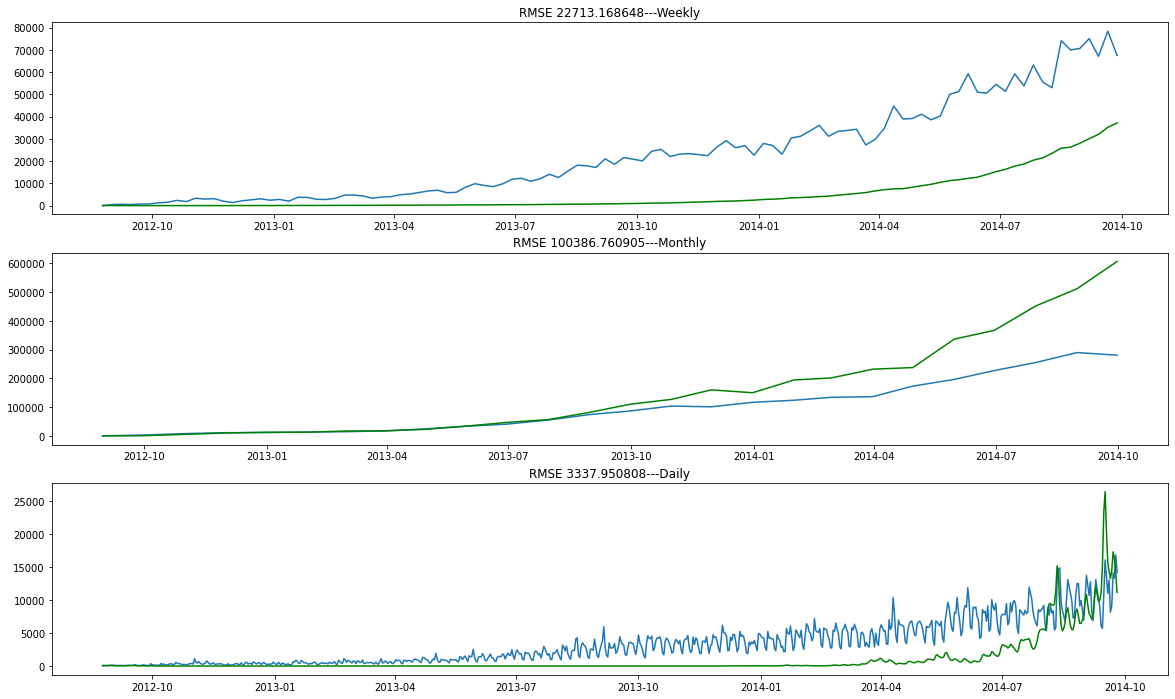

In [35]:
pred_Arima2 = np.exp(pred_Arima_log2)       #Weekly
pred_Arima3 = np.exp(pred_Arima_log3)       #Monthly
pred_Arima4 = np.exp(pred_Arima_log4)       #Daily


plt.figure(figsize=(20,12))

plt.subplot(311)
plt.plot(ts2)
plt.plot(pred_Arima2,color = 'green')
plt.title("RMSE %4f---Weekly"% np.sqrt(sum((pred_Arima2-ts2)**2)/len(ts2)))

plt.subplot(312)
plt.plot(ts3)
plt.plot(pred_Arima3,color = 'green')
plt.title("RMSE %4f---Monthly"% np.sqrt(sum((pred_Arima3-ts3)**2)/len(ts3)))

plt.subplot(313)
plt.plot(ts4)
plt.plot(pred_Arima4,color = 'green')
plt.title("RMSE %4f---Daily"% np.sqrt(sum((pred_Arima4-ts4)**2)/len(ts4)))

## Building SARIMAX MODEL

In [ ]:
import itertools
p=d=q = range(0,3)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],7) for x in list(itertools.product(p,d,q))]
print('SARIMAX PARAMETERS-\n')
print('SARIMAX-: {}x{}'.format(pdq[0],seasonal_pdq[0]))

SARIMAX PARAMETERS-

SARIMAX-: (0, 0, 0)x(0, 0, 0, 7)


In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
#Finding the right set of parameters

for params in pdq:
  for seas_params in seasonal_pdq:
    try:
      model_SARIMA4 = SARIMAX(ts_log4, order = params,seasonal_order=seas_params)
      residual_SARIMA4 = model_SARIMA4.fit(disp=-1)
      print('SARIMAX {}x{}- AIC: {}'.format(params,seas_params,residual_SARIMA4.aic))

    except:
      continue

SARIMAX (0, 0, 0)x(0, 0, 0, 7)- AIC: 5248.342676747587
SARIMAX (0, 0, 0)x(0, 0, 1, 7)- AIC: 4265.773259155201
SARIMAX (0, 0, 0)x(0, 0, 2, 7)- AIC: 3470.423441267443
SARIMAX (0, 0, 0)x(0, 1, 0, 7)- AIC: 506.1118757473979
SARIMAX (0, 0, 0)x(0, 1, 1, 7)- AIC: 356.7810895893913
SARIMAX (0, 0, 0)x(0, 1, 2, 7)- AIC: 358.06705739448734
SARIMAX (0, 0, 0)x(0, 2, 0, 7)- AIC: 1273.881507895072


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX (0, 0, 0)x(0, 2, 1, 7)- AIC: 527.8882042630669
SARIMAX (0, 0, 0)x(0, 2, 2, 7)- AIC: 322.59161529043325


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMAX (0, 0, 0)x(1, 0, 0, 7)- AIC: 555.4526745051753
SARIMAX (0, 0, 0)x(1, 0, 1, 7)- AIC: 406.3556479968383
SARIMAX (0, 0, 0)x(1, 0, 2, 7)- AIC: 407.6355664103288
SARIMAX (0, 0, 0)x(1, 1, 0, 7)- AIC: 374.39897032479644
SARIMAX (0, 0, 0)x(1, 1, 1, 7)- AIC: 357.9817132029719
SARIMAX (0, 0, 0)x(1, 1, 2, 7)- AIC: 355.7421411055846
SARIMAX (0, 0, 0)x(1, 2, 0, 7)- AIC: 835.5880639271729
SARIMAX (0, 0, 0)x(1, 2, 1, 7)- AIC: 382.4588467468607
SARIMAX (0, 0, 0)x(1, 2, 2, 7)- AIC: 319.7559289798993
SARIMAX (0, 0, 0)x(2, 0, 0, 7)- AIC: 423.9202902168249
SARIMAX (0, 0, 0)x(2, 0, 1, 7)- AIC: 407.5499728473878


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (0, 0, 0)x(2, 0, 2, 7)- AIC: 409.10688919267903
SARIMAX (0, 0, 0)x(2, 1, 0, 7)- AIC: 368.3564736465473
SARIMAX (0, 0, 0)x(2, 1, 1, 7)- AIC: 359.4053350436274
SARIMAX (0, 0, 0)x(2, 1, 2, 7)- AIC: 356.26361218843897
SARIMAX (0, 0, 0)x(2, 2, 0, 7)- AIC: 729.8310339492957
SARIMAX (0, 0, 0)x(2, 2, 1, 7)- AIC: 368.23864196229323
SARIMAX (0, 0, 0)x(2, 2, 2, 7)- AIC: 381.9868657422531
SARIMAX (0, 0, 1)x(0, 0, 0, 7)- AIC: 4244.296205218031
SARIMAX (0, 0, 1)x(0, 0, 1, 7)- AIC: 3478.354998027145
SARIMAX (0, 0, 1)x(0, 0, 2, 7)- AIC: 2834.6801633055375
SARIMAX (0, 0, 1)x(0, 1, 0, 7)- AIC: 369.38179538331076
SARIMAX (0, 0, 1)x(0, 1, 1, 7)- AIC: 159.2573666861205
SARIMAX (0, 0, 1)x(0, 1, 2, 7)- AIC: 159.82433782026052
SARIMAX (0, 0, 1)x(0, 2, 0, 7)- AIC: 1158.0260109464418
SARIMAX (0, 0, 1)x(0, 2, 1, 7)- AIC: 397.94177534991917
SARIMAX (0, 0, 1)x(0, 2, 2, 7)- AIC: 133.59202263985313
SARIMAX (0, 0, 1)x(1, 0, 0, 7)- AIC: 413.9860587290326
SARIMAX (0, 0, 1)x(1, 0, 1, 7)- AIC: 203.54528812315203


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (0, 1, 2)x(2, 0, 2, 7)- AIC: -20.965482375059764
SARIMAX (0, 1, 2)x(2, 1, 0, 7)- AIC: 143.003923050582
SARIMAX (0, 1, 2)x(2, 1, 1, 7)- AIC: -14.053104039199525
SARIMAX (0, 1, 2)x(2, 1, 2, 7)- AIC: -15.61791234687297
SARIMAX (0, 1, 2)x(2, 2, 0, 7)- AIC: 616.0036806548108


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (0, 1, 2)x(2, 2, 1, 7)- AIC: 192.48658693664396
SARIMAX (0, 1, 2)x(2, 2, 2, 7)- AIC: 236.08392210065054
SARIMAX (0, 2, 0)x(0, 0, 0, 7)- AIC: 1283.005495687501
SARIMAX (0, 2, 0)x(0, 0, 1, 7)- AIC: 1163.9537029783494
SARIMAX (0, 2, 0)x(0, 0, 2, 7)- AIC: 1090.8587786740736
SARIMAX (0, 2, 0)x(0, 1, 0, 7)- AIC: 1291.0070812848974
SARIMAX (0, 2, 0)x(0, 1, 1, 7)- AIC: 866.432822191698
SARIMAX (0, 2, 0)x(0, 1, 2, 7)- AIC: 868.3915069013335
SARIMAX (0, 2, 0)x(0, 2, 0, 7)- AIC: 2096.8989982656044
SARIMAX (0, 2, 0)x(0, 2, 1, 7)- AIC: 1320.642744391535
SARIMAX (0, 2, 0)x(0, 2, 2, 7)- AIC: 923.4259483977564
SARIMAX (0, 2, 0)x(1, 0, 0, 7)- AIC: 1079.0315304332646
SARIMAX (0, 2, 0)x(1, 0, 1, 7)- AIC: 868.7413031413198
SARIMAX (0, 2, 0)x(1, 0, 2, 7)- AIC: 870.738843055708
SARIMAX (0, 2, 0)x(1, 1, 0, 7)- AIC: 1084.465717228553
SARIMAX (0, 2, 0)x(1, 1, 1, 7)- AIC: 868.3921493314522
SARIMAX (0, 2, 0)x(1, 1, 2, 7)- AIC: 869.8383374351956
SARIMAX (0, 2, 0)x(1, 2, 0, 7)- AIC: 1649.798565640383
SARIM

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (0, 2, 1)x(1, 2, 2, 7)- AIC: 252.83512525366933
SARIMAX (0, 2, 1)x(2, 0, 0, 7)- AIC: 310.880156655746


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (0, 2, 1)x(2, 0, 1, 7)- AIC: 178.17976906978924


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (0, 2, 1)x(2, 0, 2, 7)- AIC: 180.02993054587478
SARIMAX (0, 2, 1)x(2, 1, 0, 7)- AIC: 340.4661457254671


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (0, 2, 1)x(2, 1, 1, 7)- AIC: 190.92200674110978


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (0, 2, 1)x(2, 1, 2, 7)- AIC: 189.75557421304097
SARIMAX (0, 2, 1)x(2, 2, 0, 7)- AIC: 808.0103746155442
SARIMAX (0, 2, 1)x(2, 2, 1, 7)- AIC: 394.21920315747667
SARIMAX (0, 2, 1)x(2, 2, 2, 7)- AIC: 255.1245416708226


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX (0, 2, 2)x(0, 0, 0, 7)- AIC: 559.7579622591873
SARIMAX (0, 2, 2)x(0, 0, 1, 7)- AIC: 423.9060560374045
SARIMAX (0, 2, 2)x(0, 0, 2, 7)- AIC: 317.72386419576856
SARIMAX (0, 2, 2)x(0, 1, 0, 7)- AIC: 474.0281179593136
SARIMAX (0, 2, 2)x(0, 1, 1, 7)- AIC: 59.15656931962968
SARIMAX (0, 2, 2)x(0, 1, 2, 7)- AIC: 61.062076080639315
SARIMAX (0, 2, 2)x(0, 2, 0, 7)- AIC: 1295.4120866465787
SARIMAX (0, 2, 2)x(0, 2, 1, 7)- AIC: 518.2576125107519
SARIMAX (0, 2, 2)x(0, 2, 2, 7)- AIC: 120.8799491884281
SARIMAX (0, 2, 2)x(1, 0, 0, 7)- AIC: 297.95066423681857
SARIMAX (0, 2, 2)x(1, 0, 1, 7)- AIC: 48.74122750723666
SARIMAX (0, 2, 2)x(1, 0, 2, 7)- AIC: 50.531206967607545
SARIMAX (0, 2, 2)x(1, 1, 0, 7)- AIC: 249.32009101503317
SARIMAX (0, 2, 2)x(1, 1, 1, 7)- AIC: 61.0571338750874
SARIMAX (0, 2, 2)x(1, 1, 2, 7)- AIC: 60.03418364695153
SARIMAX (0, 2, 2)x(1, 2, 0, 7)- AIC: 810.2999412361928
SARIMAX (0, 2, 2)x(1, 2, 1, 7)- AIC: 301.18598208313256


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (0, 2, 2)x(1, 2, 2, 7)- AIC: 127.15097242038814
SARIMAX (0, 2, 2)x(2, 0, 0, 7)- AIC: 180.60262219447884
SARIMAX (0, 2, 2)x(2, 0, 1, 7)- AIC: 52.152672174915466


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (0, 2, 2)x(2, 0, 2, 7)- AIC: 48.89124652924252
SARIMAX (0, 2, 2)x(2, 1, 0, 7)- AIC: 207.1223869384447
SARIMAX (0, 2, 2)x(2, 1, 1, 7)- AIC: 62.31141642555383


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (0, 2, 2)x(2, 1, 2, 7)- AIC: 59.466055232653105
SARIMAX (0, 2, 2)x(2, 2, 0, 7)- AIC: 669.0384799853958
SARIMAX (0, 2, 2)x(2, 2, 1, 7)- AIC: 262.1192984677495


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (0, 2, 2)x(2, 2, 2, 7)- AIC: 126.50883412794343
SARIMAX (1, 0, 0)x(0, 0, 0, 7)- AIC: 680.0917662621631
SARIMAX (1, 0, 0)x(0, 0, 1, 7)- AIC: 528.4792408323927
SARIMAX (1, 0, 0)x(0, 0, 2, 7)- AIC: 429.94746143666026
SARIMAX (1, 0, 0)x(0, 1, 0, 7)- AIC: 340.8770738924079
SARIMAX (1, 0, 0)x(0, 1, 1, 7)- AIC: 68.16927770817563
SARIMAX (1, 0, 0)x(0, 1, 2, 7)- AIC: 70.1355655866401
SARIMAX (1, 0, 0)x(0, 2, 0, 7)- AIC: 1138.287509588548
SARIMAX (1, 0, 0)x(0, 2, 1, 7)- AIC: 373.3346018511472
SARIMAX (1, 0, 0)x(0, 2, 2, 7)- AIC: 66.61232988394909
SARIMAX (1, 0, 0)x(1, 0, 0, 7)- AIC: 406.7861777037027
SARIMAX (1, 0, 0)x(1, 0, 1, 7)- AIC: 102.71774348345357
SARIMAX (1, 0, 0)x(1, 0, 2, 7)- AIC: 185.53173339682166
SARIMAX (1, 0, 0)x(1, 1, 0, 7)- AIC: 163.69637812625655
SARIMAX (1, 0, 0)x(1, 1, 1, 7)- AIC: 70.13551469108336
SARIMAX (1, 0, 0)x(1, 1, 2, 7)- AIC: 70.38956039665294
SARIMAX (1, 0, 0)x(1, 2, 0, 7)- AIC: 688.0090908876667
SARIMAX (1, 0, 0)x(1, 2, 1, 7)- AIC: 195.93512480956403
SARIM

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 0)x(2, 0, 1, 7)- AIC: 109.59485593033088


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 0)x(2, 0, 2, 7)- AIC: 178.1542276256851
SARIMAX (1, 0, 0)x(2, 1, 0, 7)- AIC: 133.65843522639767
SARIMAX (1, 0, 0)x(2, 1, 1, 7)- AIC: 72.13353199754195
SARIMAX (1, 0, 0)x(2, 1, 2, 7)- AIC: 71.00118474572525
SARIMAX (1, 0, 0)x(2, 2, 0, 7)- AIC: 561.9004096206927
SARIMAX (1, 0, 0)x(2, 2, 1, 7)- AIC: 163.97827575973298
SARIMAX (1, 0, 0)x(2, 2, 2, 7)- AIC: 194.92530391967975


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMAX (1, 0, 1)x(0, 0, 0, 7)- AIC: 567.129825140303
SARIMAX (1, 0, 1)x(0, 0, 1, 7)- AIC: 427.5158017935189
SARIMAX (1, 0, 1)x(0, 0, 2, 7)- AIC: 317.8187154120602
SARIMAX (1, 0, 1)x(0, 1, 0, 7)- AIC: 342.85997664606384
SARIMAX (1, 0, 1)x(0, 1, 1, 7)- AIC: 33.881598765810764
SARIMAX (1, 0, 1)x(0, 1, 2, 7)- AIC: 35.846550555060446
SARIMAX (1, 0, 1)x(0, 2, 0, 7)- AIC: 1140.0139742289243
SARIMAX (1, 0, 1)x(0, 2, 1, 7)- AIC: 375.32721714609863
SARIMAX (1, 0, 1)x(0, 2, 2, 7)- AIC: 59.6581740699589
SARIMAX (1, 0, 1)x(1, 0, 0, 7)- AIC: 297.74385644164744


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 1)x(1, 0, 1, 7)- AIC: 45.95685824325881
SARIMAX (1, 0, 1)x(1, 0, 2, 7)- AIC: 47.88737985510335
SARIMAX (1, 0, 1)x(1, 1, 0, 7)- AIC: 163.5070326683046
SARIMAX (1, 0, 1)x(1, 1, 1, 7)- AIC: 35.844166654506466
SARIMAX (1, 0, 1)x(1, 1, 2, 7)- AIC: 35.045601105812466
SARIMAX (1, 0, 1)x(1, 2, 0, 7)- AIC: 689.7401019701335


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 1)x(1, 2, 1, 7)- AIC: 197.3028895098326
SARIMAX (1, 0, 1)x(1, 2, 2, 7)- AIC: 59.09147665302447
SARIMAX (1, 0, 1)x(2, 0, 0, 7)- AIC: 201.21238256365223


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 1)x(2, 0, 1, 7)- AIC: 48.63338178170346


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 1)x(2, 0, 2, 7)- AIC: 49.017079657743835
SARIMAX (1, 0, 1)x(2, 1, 0, 7)- AIC: 132.67876824271988
SARIMAX (1, 0, 1)x(2, 1, 1, 7)- AIC: 37.192604840266426
SARIMAX (1, 0, 1)x(2, 1, 2, 7)- AIC: 34.50603199103176
SARIMAX (1, 0, 1)x(2, 2, 0, 7)- AIC: 563.7666090173802
SARIMAX (1, 0, 1)x(2, 2, 1, 7)- AIC: 165.52626872871755
SARIMAX (1, 0, 1)x(2, 2, 2, 7)- AIC: 196.17314826837776
SARIMAX (1, 0, 2)x(0, 0, 0, 7)- AIC: 417.3374561585054
SARIMAX (1, 0, 2)x(0, 0, 1, 7)- AIC: 298.1688081385795
SARIMAX (1, 0, 2)x(0, 0, 2, 7)- AIC: 212.6213954403433
SARIMAX (1, 0, 2)x(0, 1, 0, 7)- AIC: 344.19176635145095
SARIMAX (1, 0, 2)x(0, 1, 1, 7)- AIC: -19.934481056110968
SARIMAX (1, 0, 2)x(0, 1, 2, 7)- AIC: -17.960895803615017
SARIMAX (1, 0, 2)x(0, 2, 0, 7)- AIC: 1139.587750061137
SARIMAX (1, 0, 2)x(0, 2, 1, 7)- AIC: 376.98443619421454


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 2)x(0, 2, 2, 7)- AIC: 27.07768991385518


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 2)x(1, 0, 0, 7)- AIC: 202.57844214976438


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 2)x(1, 0, 1, 7)- AIC: -13.764856577421455


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 2)x(1, 0, 2, 7)- AIC: -12.620970055095341
SARIMAX (1, 0, 2)x(1, 1, 0, 7)- AIC: 152.9742228675762
SARIMAX (1, 0, 2)x(1, 1, 1, 7)- AIC: -17.961564255722408
SARIMAX (1, 0, 2)x(1, 1, 2, 7)- AIC: -17.97139487348403
SARIMAX (1, 0, 2)x(1, 2, 0, 7)- AIC: 690.3997657675906
SARIMAX (1, 0, 2)x(1, 2, 1, 7)- AIC: 189.83807507387743
SARIMAX (1, 0, 2)x(1, 2, 2, 7)- AIC: 28.922262960703733


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 2)x(2, 0, 0, 7)- AIC: 187.66461842028977


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 2)x(2, 0, 1, 7)- AIC: -10.292062511790817


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 2)x(2, 0, 2, 7)- AIC: 7.192838452591161
SARIMAX (1, 0, 2)x(2, 1, 0, 7)- AIC: 113.1045624043611
SARIMAX (1, 0, 2)x(2, 1, 1, 7)- AIC: -16.06266849792084
SARIMAX (1, 0, 2)x(2, 1, 2, 7)- AIC: -17.62598457595095
SARIMAX (1, 0, 2)x(2, 2, 0, 7)- AIC: 558.0744770305491
SARIMAX (1, 0, 2)x(2, 2, 1, 7)- AIC: 151.68175071952527


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 2)x(2, 2, 2, 7)- AIC: 188.73716710950137
SARIMAX (1, 1, 0)x(0, 0, 0, 7)- AIC: 662.2364513239949
SARIMAX (1, 1, 0)x(0, 0, 1, 7)- AIC: 498.5737268605757
SARIMAX (1, 1, 0)x(0, 0, 2, 7)- AIC: 386.15635663694144
SARIMAX (1, 1, 0)x(0, 1, 0, 7)- AIC: 523.2167174319072
SARIMAX (1, 1, 0)x(0, 1, 1, 7)- AIC: 125.17596772964558
SARIMAX (1, 1, 0)x(0, 1, 2, 7)- AIC: 126.69804682142404
SARIMAX (1, 1, 0)x(0, 2, 0, 7)- AIC: 1336.878980542466
SARIMAX (1, 1, 0)x(0, 2, 1, 7)- AIC: 560.0087046111612
SARIMAX (1, 1, 0)x(0, 2, 2, 7)- AIC: 182.0132744834676
SARIMAX (1, 1, 0)x(1, 0, 0, 7)- AIC: 354.9462850932124
SARIMAX (1, 1, 0)x(1, 0, 1, 7)- AIC: 123.04137939101702
SARIMAX (1, 1, 0)x(1, 0, 2, 7)- AIC: 124.66284977406536
SARIMAX (1, 1, 0)x(1, 1, 0, 7)- AIC: 319.46838691058747
SARIMAX (1, 1, 0)x(1, 1, 1, 7)- AIC: 126.67611058662155
SARIMAX (1, 1, 0)x(1, 1, 2, 7)- AIC: 128.23878754293378
SARIMAX (1, 1, 0)x(1, 2, 0, 7)- AIC: 869.7029275278876
SARIMAX (1, 1, 0)x(1, 2, 1, 7)- AIC: 363.46236239904323


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 1, 2)x(1, 1, 2, 7)- AIC: -15.65990805975585
SARIMAX (1, 1, 2)x(1, 2, 0, 7)- AIC: 698.3220003476617
SARIMAX (1, 1, 2)x(1, 2, 1, 7)- AIC: 210.76163203036884


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 1, 2)x(1, 2, 2, 7)- AIC: 50.33867002656467
SARIMAX (1, 1, 2)x(2, 0, 0, 7)- AIC: 100.73995378373871
SARIMAX (1, 1, 2)x(2, 0, 1, 7)- AIC: -22.055830223967405


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 1, 2)x(2, 0, 2, 7)- AIC: -20.913121875258327
SARIMAX (1, 1, 2)x(2, 1, 0, 7)- AIC: 125.5003294162947
SARIMAX (1, 1, 2)x(2, 1, 1, 7)- AIC: -14.82750502224053


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 1, 2)x(2, 1, 2, 7)- AIC: -16.576048596806686


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 1, 2)x(2, 2, 0, 7)- AIC: 573.0983840965829


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 1, 2)x(2, 2, 1, 7)- AIC: 178.23605774326995
SARIMAX (1, 1, 2)x(2, 2, 2, 7)- AIC: 214.7506380530324
SARIMAX (1, 2, 0)x(0, 0, 0, 7)- AIC: 1161.0203663532948
SARIMAX (1, 2, 0)x(0, 0, 1, 7)- AIC: 995.7070841484658
SARIMAX (1, 2, 0)x(0, 0, 2, 7)- AIC: 884.9863420536338
SARIMAX (1, 2, 0)x(0, 1, 0, 7)- AIC: 1016.5196385714919
SARIMAX (1, 2, 0)x(0, 1, 1, 7)- AIC: 631.3346052777396
SARIMAX (1, 2, 0)x(0, 1, 2, 7)- AIC: 631.6116744765021
SARIMAX (1, 2, 0)x(0, 2, 0, 7)- AIC: 1813.1359242189646
SARIMAX (1, 2, 0)x(0, 2, 1, 7)- AIC: 1048.767983217633
SARIMAX (1, 2, 0)x(0, 2, 2, 7)- AIC: 683.6835278688919
SARIMAX (1, 2, 0)x(1, 0, 0, 7)- AIC: 854.1079076408514
SARIMAX (1, 2, 0)x(1, 0, 1, 7)- AIC: 633.4363528104234
SARIMAX (1, 2, 0)x(1, 0, 2, 7)- AIC: 633.9631272134963
SARIMAX (1, 2, 0)x(1, 1, 0, 7)- AIC: 833.8764151217982
SARIMAX (1, 2, 0)x(1, 1, 1, 7)- AIC: 631.6069470298181
SARIMAX (1, 2, 0)x(1, 1, 2, 7)- AIC: 633.5997227677368
SARIMAX (1, 2, 0)x(1, 2, 0, 7)- AIC: 1368.9946639321724
SARIM

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 0)x(2, 2, 2, 7)- AIC: 683.9910932118398
SARIMAX (1, 2, 1)x(0, 0, 0, 7)- AIC: 670.9057069417717
SARIMAX (1, 2, 1)x(0, 0, 1, 7)- AIC: 507.00558078655513
SARIMAX (1, 2, 1)x(0, 0, 2, 7)- AIC: 394.35648205806734
SARIMAX (1, 2, 1)x(0, 1, 0, 7)- AIC: 532.64830952136
SARIMAX (1, 2, 1)x(0, 1, 1, 7)- AIC: 139.08781251138194
SARIMAX (1, 2, 1)x(0, 1, 2, 7)- AIC: 140.63260374065047
SARIMAX (1, 2, 1)x(0, 2, 0, 7)- AIC: 1345.2042672903617
SARIMAX (1, 2, 1)x(0, 2, 1, 7)- AIC: 576.2941360886939
SARIMAX (1, 2, 1)x(0, 2, 2, 7)- AIC: 201.09593329995172
SARIMAX (1, 2, 1)x(1, 0, 0, 7)- AIC: 362.67956904110935
SARIMAX (1, 2, 1)x(1, 0, 1, 7)- AIC: 128.73527794396654


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 1)x(1, 0, 2, 7)- AIC: 130.3405201159904
SARIMAX (1, 2, 1)x(1, 1, 0, 7)- AIC: 329.962067250424
SARIMAX (1, 2, 1)x(1, 1, 1, 7)- AIC: 140.61853352355433
SARIMAX (1, 2, 1)x(1, 1, 2, 7)- AIC: 142.17443738014038
SARIMAX (1, 2, 1)x(1, 2, 0, 7)- AIC: 879.7235140459993
SARIMAX (1, 2, 1)x(1, 2, 1, 7)- AIC: 380.7956823924169


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 1)x(1, 2, 2, 7)- AIC: 202.82653758330366


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 1)x(2, 0, 0, 7)- AIC: 261.38050436015806


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 1)x(2, 0, 1, 7)- AIC: 130.37105712086006


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 1)x(2, 0, 2, 7)- AIC: 132.44683140256188
SARIMAX (1, 2, 1)x(2, 1, 0, 7)- AIC: 290.08424211282255


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 1)x(2, 1, 1, 7)- AIC: 142.4343351559748


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 1)x(2, 1, 2, 7)- AIC: 140.01788063692567
SARIMAX (1, 2, 1)x(2, 2, 0, 7)- AIC: 749.5877631125618
SARIMAX (1, 2, 1)x(2, 2, 1, 7)- AIC: 344.01596355721006


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 1)x(2, 2, 2, 7)- AIC: 203.18991338094114
SARIMAX (1, 2, 2)x(0, 0, 0, 7)- AIC: 679.0572816291502
SARIMAX (1, 2, 2)x(0, 0, 1, 7)- AIC: 523.6737687012345
SARIMAX (1, 2, 2)x(0, 0, 2, 7)- AIC: 424.18194667824866
SARIMAX (1, 2, 2)x(0, 1, 0, 7)- AIC: 558.9876061216902
SARIMAX (1, 2, 2)x(0, 1, 1, 7)- AIC: -0.02737688988091236


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 2)x(0, 1, 2, 7)- AIC: 2.4489500140667815
SARIMAX (1, 2, 2)x(0, 2, 0, 7)- AIC: 1160.7230311971755
SARIMAX (1, 2, 2)x(0, 2, 1, 7)- AIC: 409.1893620938356
SARIMAX (1, 2, 2)x(0, 2, 2, 7)- AIC: 78.70228106631055
SARIMAX (1, 2, 2)x(1, 0, 0, 7)- AIC: 388.0853408920483


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 2)x(1, 0, 1, 7)- AIC: 171.2728920118662


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 2)x(1, 0, 2, 7)- AIC: 173.9045667329885


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 2)x(1, 1, 0, 7)- AIC: 177.23438634792794
SARIMAX (1, 2, 2)x(1, 1, 1, 7)- AIC: 7736.03239800007


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 2)x(1, 1, 2, 7)- AIC: 24.24337099387961


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 2)x(1, 2, 0, 7)- AIC: 714.5145425951101
SARIMAX (1, 2, 2)x(1, 2, 1, 7)- AIC: 233.64014473629382


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 2)x(1, 2, 2, 7)- AIC: 84.1743865000567
SARIMAX (1, 2, 2)x(2, 0, 0, 7)- AIC: 100.23743812003244


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 2)x(2, 0, 1, 7)- AIC: 173.64710687181565


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 2)x(2, 0, 2, 7)- AIC: 176.11021941232622
SARIMAX (1, 2, 2)x(2, 1, 0, 7)- AIC: 333.8262862426269


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 2)x(2, 1, 1, 7)- AIC: 17.253413322209155


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 2)x(2, 1, 2, 7)- AIC: 18.202882275622784
SARIMAX (1, 2, 2)x(2, 2, 0, 7)- AIC: 590.6376853144102
SARIMAX (1, 2, 2)x(2, 2, 1, 7)- AIC: 201.90387859379888


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 2)x(2, 2, 2, 7)- AIC: 80.20852584502626
SARIMAX (2, 0, 0)x(0, 0, 0, 7)- AIC: 672.0535353743519
SARIMAX (2, 0, 0)x(0, 0, 1, 7)- AIC: 508.7649596243965
SARIMAX (2, 0, 0)x(0, 0, 2, 7)- AIC: 396.70342653373217
SARIMAX (2, 0, 0)x(0, 1, 0, 7)- AIC: 342.86223369656636
SARIMAX (2, 0, 0)x(0, 1, 1, 7)- AIC: 60.892158940068384
SARIMAX (2, 0, 0)x(0, 1, 2, 7)- AIC: 62.885468032514495
SARIMAX (2, 0, 0)x(0, 2, 0, 7)- AIC: 1139.9671809087597
SARIMAX (2, 0, 0)x(0, 2, 1, 7)- AIC: 375.32660147794957
SARIMAX (2, 0, 0)x(0, 2, 2, 7)- AIC: 65.29803722365585
SARIMAX (2, 0, 0)x(1, 0, 0, 7)- AIC: 366.0606250476491
SARIMAX (2, 0, 0)x(1, 0, 1, 7)- AIC: 137.0616860069976
SARIMAX (2, 0, 0)x(1, 0, 2, 7)- AIC: 138.7023857482328
SARIMAX (2, 0, 0)x(1, 1, 0, 7)- AIC: 164.6644605530435
SARIMAX (2, 0, 0)x(1, 1, 1, 7)- AIC: 62.88530331375034
SARIMAX (2, 0, 0)x(1, 1, 2, 7)- AIC: 63.27127608520527
SARIMAX (2, 0, 0)x(1, 2, 0, 7)- AIC: 689.7966083269902
SARIMAX (2, 0, 0)x(1, 2, 1, 7)- AIC: 197.61542069224788
SAR

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 1)x(0, 2, 0, 7)- AIC: 1055.3925202512262
SARIMAX (2, 0, 1)x(0, 2, 1, 7)- AIC: 364.1199545397849


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 1)x(0, 2, 2, 7)- AIC: 32.05907212782682
SARIMAX (2, 0, 1)x(1, 0, 0, 7)- AIC: 387.81408039214983


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 1)x(1, 0, 1, 7)- AIC: 8.032285721132268


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 1)x(1, 0, 2, 7)- AIC: 148.87134825700056
SARIMAX (2, 0, 1)x(1, 1, 0, 7)- AIC: 157.8998238582709


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 1)x(1, 1, 1, 7)- AIC: -16.95800945624279


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 1)x(1, 1, 2, 7)- AIC: -14.869278205733053
SARIMAX (2, 0, 1)x(1, 2, 0, 7)- AIC: 691.9284011385581
SARIMAX (2, 0, 1)x(1, 2, 1, 7)- AIC: 198.92406083291462


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 1)x(1, 2, 2, 7)- AIC: 57.60759268457724


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 1)x(2, 0, 0, 7)- AIC: 113.0233278634949


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 1)x(2, 0, 1, 7)- AIC: 7.559663590035001


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 1)x(2, 0, 2, 7)- AIC: 53.813848983947935
SARIMAX (2, 0, 1)x(2, 1, 0, 7)- AIC: 137.65573976625603


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 1)x(2, 1, 1, 7)- AIC: -15.093487894623735


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 1)x(2, 1, 2, 7)- AIC: -13.124873434690898
SARIMAX (2, 0, 1)x(2, 2, 0, 7)- AIC: 565.5884642114416
SARIMAX (2, 0, 1)x(2, 2, 1, 7)- AIC: 167.62071304705498
SARIMAX (2, 0, 1)x(2, 2, 2, 7)- AIC: 198.90564427312512


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2)x(0, 0, 0, 7)- AIC: 442.7276780648292


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2)x(0, 0, 1, 7)- AIC: 431.3378402480869


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2)x(0, 0, 2, 7)- AIC: 319.1938732203819
SARIMAX (2, 0, 2)x(0, 1, 0, 7)- AIC: 257.91892241489825


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2)x(0, 1, 1, 7)- AIC: -19.986749865145498


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2)x(0, 1, 2, 7)- AIC: -18.08623495873445
SARIMAX (2, 0, 2)x(0, 2, 0, 7)- AIC: 976.3797994192645


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2)x(0, 2, 1, 7)- AIC: 295.2907085020089


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2)x(0, 2, 2, 7)- AIC: 34.2638660815947
SARIMAX (2, 0, 2)x(1, 0, 0, 7)- AIC: 301.4807589447693


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2)x(1, 0, 1, 7)- AIC: 42.08817137142404


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2)x(1, 0, 2, 7)- AIC: 57.365134003989795
SARIMAX (2, 0, 2)x(1, 1, 0, 7)- AIC: 154.8047291070119


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2)x(1, 1, 1, 7)- AIC: -17.415913218406587


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2)x(1, 1, 2, 7)- AIC: -16.433834933803155
SARIMAX (2, 0, 2)x(1, 2, 0, 7)- AIC: 692.3996023248493


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2)x(1, 2, 1, 7)- AIC: 191.67209647106762


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2)x(1, 2, 2, 7)- AIC: 34.68502732723965


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2)x(2, 0, 0, 7)- AIC: 161.31245559799348


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2)x(2, 0, 1, 7)- AIC: 57.64424114321298


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2)x(2, 0, 2, 7)- AIC: 3.684002110111635
SARIMAX (2, 0, 2)x(2, 1, 0, 7)- AIC: 114.77094877156523


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2)x(2, 1, 1, 7)- AIC: -16.15082555988633


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2)x(2, 1, 2, 7)- AIC: -14.084152667131946
SARIMAX (2, 0, 2)x(2, 2, 0, 7)- AIC: 559.5073369219053
SARIMAX (2, 0, 2)x(2, 2, 1, 7)- AIC: 153.3204880494074


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2)x(2, 2, 2, 7)- AIC: 190.1148304976662
SARIMAX (2, 1, 0)x(0, 0, 0, 7)- AIC: 540.243771419724
SARIMAX (2, 1, 0)x(0, 0, 1, 7)- AIC: 414.3944429355666
SARIMAX (2, 1, 0)x(0, 0, 2, 7)- AIC: 319.81983969973646
SARIMAX (2, 1, 0)x(0, 1, 0, 7)- AIC: 481.1879733747712
SARIMAX (2, 1, 0)x(0, 1, 1, 7)- AIC: 61.56158849523234
SARIMAX (2, 1, 0)x(0, 1, 2, 7)- AIC: 63.50403494541709
SARIMAX (2, 1, 0)x(0, 2, 0, 7)- AIC: 1304.5883467576705
SARIMAX (2, 1, 0)x(0, 2, 1, 7)- AIC: 518.3560734216003
SARIMAX (2, 1, 0)x(0, 2, 2, 7)- AIC: 120.52319963787022
SARIMAX (2, 1, 0)x(1, 0, 0, 7)- AIC: 298.11564146085493
SARIMAX (2, 1, 0)x(1, 0, 1, 7)- AIC: 58.710534760060455
SARIMAX (2, 1, 0)x(1, 0, 2, 7)- AIC: 60.61204520918636
SARIMAX (2, 1, 0)x(1, 1, 0, 7)- AIC: 254.1002279513258
SARIMAX (2, 1, 0)x(1, 1, 1, 7)- AIC: 63.49990530033989
SARIMAX (2, 1, 0)x(1, 1, 2, 7)- AIC: 63.263611393405796
SARIMAX (2, 1, 0)x(1, 2, 0, 7)- AIC: 823.1274564367748
SARIMAX (2, 1, 0)x(1, 2, 1, 7)- AIC: 298.89712172581386
SARI

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 1, 0)x(2, 2, 1, 7)- AIC: 250.42997209719346
SARIMAX (2, 1, 0)x(2, 2, 2, 7)- AIC: 296.77017428790697
SARIMAX (2, 1, 1)x(0, 0, 0, 7)- AIC: 397.8901579386975
SARIMAX (2, 1, 1)x(0, 0, 1, 7)- AIC: 286.4356242421383
SARIMAX (2, 1, 1)x(0, 0, 2, 7)- AIC: 201.95379123555472
SARIMAX (2, 1, 1)x(0, 1, 0, 7)- AIC: 344.79974385818315
SARIMAX (2, 1, 1)x(0, 1, 1, 7)- AIC: -17.86691124749342
SARIMAX (2, 1, 1)x(0, 1, 2, 7)- AIC: -16.10616317373396
SARIMAX (2, 1, 1)x(0, 2, 0, 7)- AIC: 1147.0519141543834
SARIMAX (2, 1, 1)x(0, 2, 1, 7)- AIC: 389.20160345783603
SARIMAX (2, 1, 1)x(0, 2, 2, 7)- AIC: 74.82887043867504
SARIMAX (2, 1, 1)x(1, 0, 0, 7)- AIC: 185.63879119522005
SARIMAX (2, 1, 1)x(1, 0, 1, 7)- AIC: -23.150319716778
SARIMAX (2, 1, 1)x(1, 0, 2, 7)- AIC: -21.349121837119924
SARIMAX (2, 1, 1)x(1, 1, 0, 7)- AIC: 160.7912300072576
SARIMAX (2, 1, 1)x(1, 1, 1, 7)- AIC: -16.113370707178348


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 1, 1)x(1, 1, 2, 7)- AIC: -14.999365291357407
SARIMAX (2, 1, 1)x(1, 2, 0, 7)- AIC: 698.3978918108633
SARIMAX (2, 1, 1)x(1, 2, 1, 7)- AIC: 211.01339415142962
SARIMAX (2, 1, 1)x(1, 2, 2, 7)- AIC: 74.21106859613442
SARIMAX (2, 1, 1)x(2, 0, 0, 7)- AIC: 101.08180858984275
SARIMAX (2, 1, 1)x(2, 0, 1, 7)- AIC: -21.35366946599862


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 1, 1)x(2, 0, 2, 7)- AIC: -20.29394431611763
SARIMAX (2, 1, 1)x(2, 1, 0, 7)- AIC: 125.67333497409788
SARIMAX (2, 1, 1)x(2, 1, 1, 7)- AIC: -14.159654105181943
SARIMAX (2, 1, 1)x(2, 1, 2, 7)- AIC: -15.97044137879746
SARIMAX (2, 1, 1)x(2, 2, 0, 7)- AIC: 573.191348087759
SARIMAX (2, 1, 1)x(2, 2, 1, 7)- AIC: 178.3802225079001
SARIMAX (2, 1, 1)x(2, 2, 2, 7)- AIC: 210.2115590987235
SARIMAX (2, 1, 2)x(0, 0, 0, 7)- AIC: 399.20952857710574
SARIMAX (2, 1, 2)x(0, 0, 1, 7)- AIC: 287.9120863758618
SARIMAX (2, 1, 2)x(0, 0, 2, 7)- AIC: 203.50204979235906
SARIMAX (2, 1, 2)x(0, 1, 0, 7)- AIC: 333.16498868380376
SARIMAX (2, 1, 2)x(0, 1, 1, 7)- AIC: -16.566379285725873
SARIMAX (2, 1, 2)x(0, 1, 2, 7)- AIC: -14.812000107214885
SARIMAX (2, 1, 2)x(0, 2, 0, 7)- AIC: 1125.4943964347722
SARIMAX (2, 1, 2)x(0, 2, 1, 7)- AIC: 378.00050217348996


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 1, 2)x(0, 2, 2, 7)- AIC: 45.48059363204783
SARIMAX (2, 1, 2)x(1, 0, 0, 7)- AIC: 191.4275849972288


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 1, 2)x(1, 0, 1, 7)- AIC: -21.908490566865538


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 1, 2)x(1, 0, 2, 7)- AIC: -20.101536209059702
SARIMAX (2, 1, 2)x(1, 1, 0, 7)- AIC: 162.08406113436212
SARIMAX (2, 1, 2)x(1, 1, 1, 7)- AIC: -14.820336311924734


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 1, 2)x(1, 1, 2, 7)- AIC: -13.651236188990822
SARIMAX (2, 1, 2)x(1, 2, 0, 7)- AIC: 697.0052115063344


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 1, 2)x(1, 2, 1, 7)- AIC: 212.31540466223322


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 1, 2)x(1, 2, 2, 7)- AIC: 77.2156165246115
SARIMAX (2, 1, 2)x(2, 0, 0, 7)- AIC: 101.96252549932981


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 1, 2)x(2, 0, 1, 7)- AIC: -20.11161174057486


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 1, 2)x(2, 0, 2, 7)- AIC: -18.95802433691989


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 1, 2)x(2, 1, 0, 7)- AIC: 126.06607378496989


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 1, 2)x(2, 1, 1, 7)- AIC: -12.890130815808817


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 1, 2)x(2, 1, 2, 7)- AIC: -14.684168723153732
SARIMAX (2, 1, 2)x(2, 2, 0, 7)- AIC: 573.440935841619
SARIMAX (2, 1, 2)x(2, 2, 1, 7)- AIC: 178.83427738974885


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 1, 2)x(2, 2, 2, 7)- AIC: 210.9413455585488
SARIMAX (2, 2, 0)x(0, 0, 0, 7)- AIC: 947.0008270845818
SARIMAX (2, 2, 0)x(0, 0, 1, 7)- AIC: 828.5665902909698
SARIMAX (2, 2, 0)x(0, 0, 2, 7)- AIC: 733.1881266798873
SARIMAX (2, 2, 0)x(0, 1, 0, 7)- AIC: 890.718570019492
SARIMAX (2, 2, 0)x(0, 1, 1, 7)- AIC: 476.2612300593757
SARIMAX (2, 2, 0)x(0, 1, 2, 7)- AIC: 478.2579899755029
SARIMAX (2, 2, 0)x(0, 2, 0, 7)- AIC: 1706.8057518857242
SARIMAX (2, 2, 0)x(0, 2, 1, 7)- AIC: 924.2500476008337
SARIMAX (2, 2, 0)x(0, 2, 2, 7)- AIC: 532.4186284786967
SARIMAX (2, 2, 0)x(1, 0, 0, 7)- AIC: 713.2711919038564
SARIMAX (2, 2, 0)x(1, 0, 1, 7)- AIC: 476.74359660243084
SARIMAX (2, 2, 0)x(1, 0, 2, 7)- AIC: 478.7212554460203
SARIMAX (2, 2, 0)x(1, 1, 0, 7)- AIC: 669.9950217871981
SARIMAX (2, 2, 0)x(1, 1, 1, 7)- AIC: 478.25778002671166
SARIMAX (2, 2, 0)x(1, 1, 2, 7)- AIC: 478.31081533394087
SARIMAX (2, 2, 0)x(1, 2, 0, 7)- AIC: 1226.807684064449
SARIMAX (2, 2, 0)x(1, 2, 1, 7)- AIC: 711.1295557715972
SARIMAX

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 1)x(1, 0, 1, 7)- AIC: 65.03254872632962


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 1)x(1, 0, 2, 7)- AIC: 66.8942809602467
SARIMAX (2, 2, 1)x(1, 1, 0, 7)- AIC: 265.2332867202956
SARIMAX (2, 2, 1)x(1, 1, 1, 7)- AIC: 78.0096163880749
SARIMAX (2, 2, 1)x(1, 1, 2, 7)- AIC: 77.76002078011567
SARIMAX (2, 2, 1)x(1, 2, 0, 7)- AIC: 833.665442910052
SARIMAX (2, 2, 1)x(1, 2, 1, 7)- AIC: 316.8579813538493
SARIMAX (2, 2, 1)x(1, 2, 2, 7)- AIC: 142.63238077662913
SARIMAX (2, 2, 1)x(2, 0, 0, 7)- AIC: 193.92084276094545


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 1)x(2, 0, 1, 7)- AIC: 66.90665268354527


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 1)x(2, 0, 2, 7)- AIC: 67.94121427233682
SARIMAX (2, 2, 1)x(2, 1, 0, 7)- AIC: 213.78230846648867


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 1)x(2, 1, 1, 7)- AIC: 79.30258334632879


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 1)x(2, 1, 2, 7)- AIC: 78.24487797176772
SARIMAX (2, 2, 1)x(2, 2, 0, 7)- AIC: 679.3117764331447
SARIMAX (2, 2, 1)x(2, 2, 1, 7)- AIC: 268.9342697670312


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 1)x(2, 2, 2, 7)- AIC: 143.28676549376615
SARIMAX (2, 2, 2)x(0, 0, 0, 7)- AIC: 395.82116846538787
SARIMAX (2, 2, 2)x(0, 0, 1, 7)- AIC: 282.9922395776097
SARIMAX (2, 2, 2)x(0, 0, 2, 7)- AIC: 398.3299265107976
SARIMAX (2, 2, 2)x(0, 1, 0, 7)- AIC: 530.0795653520736


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 2)x(0, 1, 1, 7)- AIC: -0.8124388028216174


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 2)x(0, 1, 2, 7)- AIC: 1.6219616128972802
SARIMAX (2, 2, 2)x(0, 2, 0, 7)- AIC: 1162.0180696263753
SARIMAX (2, 2, 2)x(0, 2, 1, 7)- AIC: 407.4536706731793


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 2)x(0, 2, 2, 7)- AIC: 74.09215301704472
SARIMAX (2, 2, 2)x(1, 0, 0, 7)- AIC: 363.0120960003362
SARIMAX (2, 2, 2)x(1, 0, 1, 7)- AIC: 132.6869257549256
SARIMAX (2, 2, 2)x(1, 0, 2, 7)- AIC: 134.32195901988626
SARIMAX (2, 2, 2)x(1, 1, 0, 7)- AIC: 177.10620296488716


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 2)x(1, 1, 1, 7)- AIC: 2.638490217971423


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 2)x(1, 1, 2, 7)- AIC: 3.3860294435403944
SARIMAX (2, 2, 2)x(1, 2, 0, 7)- AIC: 716.0135626046642
SARIMAX (2, 2, 2)x(1, 2, 1, 7)- AIC: 252.5332032886061


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 2)x(1, 2, 2, 7)- AIC: 82.4314176586256


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 2)x(2, 0, 0, 7)- AIC: 139.71708496511576
SARIMAX (2, 2, 2)x(2, 0, 1, 7)- AIC: 134.26494042119367


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 2)x(2, 0, 2, 7)- AIC: 10.16172013023376


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 2)x(2, 1, 0, 7)- AIC: 142.68688482685658


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 2)x(2, 1, 1, 7)- AIC: 36.86565192829758


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 2)x(2, 1, 2, 7)- AIC: 4.6665974455530375


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 2)x(2, 2, 0, 7)- AIC: 593.1157266985413
SARIMAX (2, 2, 2)x(2, 2, 1, 7)- AIC: 216.57311775036578


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 2)x(2, 2, 2, 7)- AIC: 80.71652850212519


"\n#Weekly\nplt.subplot(311)\nplt.plot(ts_log_diff2)\nplt.plot(residual_SARIMA2.fittedvalues,color = 'red')\nplt.title('RSS : %4f'% sum((residual_SARIMA2.fittedvalues - ts_log_diff2)**2))\n\n#Monthly\nplt.subplot(312)\nplt.plot(ts_log_diff3)\nplt.plot(residual_SARIMA3.fittedvalues,color = 'red')\nplt.title('RSS : %4f'% sum((residual_SARIMA3.fittedvalues - ts_log_diff3)**2))\n"

## Choosing the parameters with the lowest AIC score from above.

Here we are implementing Sarimax only on DAILY distribution of training Data because its more effecient than Monthly and Weekly distributions.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5, 1.0, 'RMSE 689.970409')

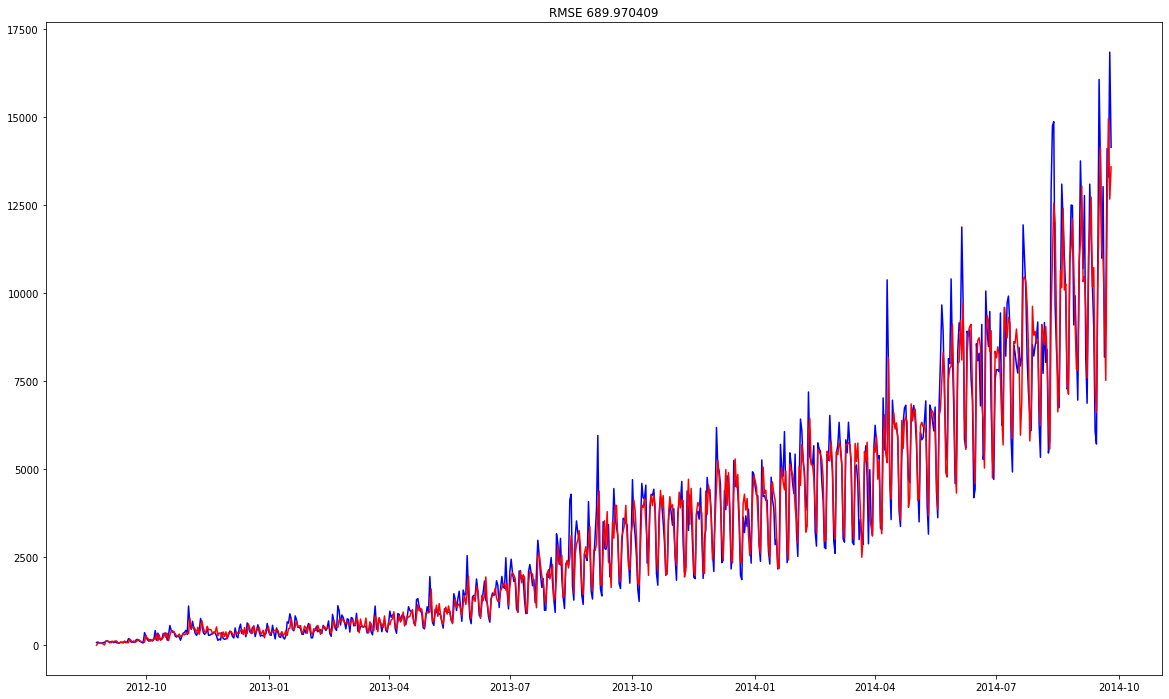

In [40]:
model_SARIMA4 = SARIMAX(ts4, order = (2,1,2),seasonal_order=(1,0,1,7))
residual_SARIMA4 = model_SARIMA4.fit(disp=-1)
plt.figure(figsize = (20,12))

#Daily
plt.subplot(111)
plt.plot(ts4,color = 'blue')
plt.plot(residual_SARIMA4.fittedvalues,color = 'red')
plt.title("RMSE %4f"% np.sqrt(sum((residual_SARIMA4.fittedvalues-ts4)**2)/len(ts4)))

## SARIMAX performs better than ARIMA because of the Seasonality-Factor